# 1.Problem Statement

Task 1:-Prepare a complete data analysis report on the given data.

Task 2:-Create a predictive model by applying some data science techniques for the price of cars with the available independent variables. That should help the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels


# 2.Import Basic Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sweetviz as sv
import pickle

%matplotlib inline
import warnings
warnings.filterwarnings('ignore') 



C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
from pandas_profiling import ProfileReport
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split ,GridSearchCV

from sklearn.linear_model import LinearRegression , Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error , mean_absolute_error ,r2_score


# 3.Load Data

In [3]:
#Load Dataset
df = pd.read_csv("auto_imports.csv") #Here we get without column name dataset
df

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
196,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
197,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
198,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [4]:
names = ["Symboling","Normalized-Losses","Make","Fuel-Type","Aspiration","Num-Of-Doors","Body-Style","Drive-Wheels","Engine-Location","Wheel-Base","Length","Width","Height","Curb-Weight","Engine-Type","Num-Of-Cylinders","Engine-Size","Fuel-System","Bore","Stroke"," Compression-Ratio","Horsepower","Peak-rpm","City-mpg","Highway-mpg","Price"]
names

['Symboling',
 'Normalized-Losses',
 'Make',
 'Fuel-Type',
 'Aspiration',
 'Num-Of-Doors',
 'Body-Style',
 'Drive-Wheels',
 'Engine-Location',
 'Wheel-Base',
 'Length',
 'Width',
 'Height',
 'Curb-Weight',
 'Engine-Type',
 'Num-Of-Cylinders',
 'Engine-Size',
 'Fuel-System',
 'Bore',
 'Stroke',
 ' Compression-Ratio',
 'Horsepower',
 'Peak-rpm',
 'City-mpg',
 'Highway-mpg',
 'Price']

In [5]:

#Add column names in given dataset.
# According to given dataset "?" is consider as a null value.
df = pd.read_csv("auto_imports.csv",na_values = ["?"],names = ["Symboling","Normalized-Losses","Make","Fuel-Type","Aspiration","Num-Of-Doors","Body-Style","Drive-Wheels","Engine-Location","Wheel-Base","Length","Width","Height","Curb-Weight","Engine-Type","Num-Of-Cylinders","Engine-Size","Fuel-System","Bore","Stroke","Compression-Ratio","Horsepower","Peak-rpm","City-mpg","Highway-mpg","Price"])
df

,Symboling,Normalized-Losses,Make,Fuel-Type,Aspiration,Num-Of-Doors,Body-Style,Drive-Wheels,Engine-Location,Wheel-Base,...,Engine-Size,Fuel-System,Bore,Stroke,Compression-Ratio,Horsepower,Peak-rpm,City-mpg,Highway-mpg,Price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845
197,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045
198,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485
199,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470


In [6]:


# Overview Dataset

prof = ProfileReport(df)
prof.to_file(output_file='AutoPredPrice.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
#To featch all columns
pd.set_option("display.max_columns", None)
df

,Symboling,Normalized-Losses,Make,Fuel-Type,Aspiration,Num-Of-Doors,Body-Style,Drive-Wheels,Engine-Location,Wheel-Base,Length,Width,Height,Curb-Weight,Engine-Type,Num-Of-Cylinders,Engine-Size,Fuel-System,Bore,Stroke,Compression-Ratio,Horsepower,Peak-rpm,City-mpg,Highway-mpg,Price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845
197,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045
198,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485
199,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470


In [8]:
#To Show all rows
pd.set_option("display.max_rows", None)
df

,Symboling,Normalized-Losses,Make,Fuel-Type,Aspiration,Num-Of-Doors,Body-Style,Drive-Wheels,Engine-Location,Wheel-Base,Length,Width,Height,Curb-Weight,Engine-Type,Num-Of-Cylinders,Engine-Size,Fuel-System,Bore,Stroke,Compression-Ratio,Horsepower,Peak-rpm,City-mpg,Highway-mpg,Price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111.0,5000.0,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111.0,5000.0,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.00,154.0,5000.0,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.00,102.0,5500.0,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.00,115.0,5500.0,18,22,17450
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,15250
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,17710
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,18920
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.30,140.0,5500.0,17,20,23875
9,2,192.0,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.80,101.0,5800.0,23,29,16430


# 4.Domain Analysis

# 5.Basic Checks

In [9]:
#To check number of rows and columns.
df.shape

(201, 26)

In [10]:
# Print frist five rows

df.head()

,Symboling,Normalized-Losses,Make,Fuel-Type,Aspiration,Num-Of-Doors,Body-Style,Drive-Wheels,Engine-Location,Wheel-Base,Length,Width,Height,Curb-Weight,Engine-Type,Num-Of-Cylinders,Engine-Size,Fuel-System,Bore,Stroke,Compression-Ratio,Horsepower,Peak-rpm,City-mpg,Highway-mpg,Price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450


In [11]:
#To check last five rows
df.tail()

,Symboling,Normalized-Losses,Make,Fuel-Type,Aspiration,Num-Of-Doors,Body-Style,Drive-Wheels,Engine-Location,Wheel-Base,Length,Width,Height,Curb-Weight,Engine-Type,Num-Of-Cylinders,Engine-Size,Fuel-System,Bore,Stroke,Compression-Ratio,Horsepower,Peak-rpm,City-mpg,Highway-mpg,Price
196,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845
197,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045
198,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485
199,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470
200,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,19,25,22625


In [12]:
#To check random rows
df.sample(5)

,Symboling,Normalized-Losses,Make,Fuel-Type,Aspiration,Num-Of-Doors,Body-Style,Drive-Wheels,Engine-Location,Wheel-Base,Length,Width,Height,Curb-Weight,Engine-Type,Num-Of-Cylinders,Engine-Size,Fuel-System,Bore,Stroke,Compression-Ratio,Horsepower,Peak-rpm,City-mpg,Highway-mpg,Price
107,0,NaN,peugot,diesel,turbo,four,wagon,rwd,front,114.2,198.9,68.4,58.7,3430,l,four,152,idi,3.70,3.52,21.0,95.0,4150.0,25,25,13860
33,1,101.0,honda,gas,std,two,hatchback,fwd,front,93.7,150.0,64.0,52.6,1956,ohc,four,92,1bbl,2.91,3.41,9.2,76.0,6000.0,30,34,7129
39,0,85.0,honda,gas,std,four,sedan,fwd,front,96.5,175.4,62.5,54.1,2372,ohc,four,110,1bbl,3.15,3.58,9.0,86.0,5800.0,27,33,10295
9,2,192.0,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.8,101.0,5800.0,23,29,16430
74,2,161.0,mitsubishi,gas,std,two,hatchback,fwd,front,93.7,157.3,64.4,50.8,1944,ohc,four,92,2bbl,2.97,3.23,9.4,68.0,5500.0,31,38,6189


In [13]:
# Print all the columns

df.columns

Index(['Symboling', 'Normalized-Losses', 'Make', 'Fuel-Type', 'Aspiration',
       'Num-Of-Doors', 'Body-Style', 'Drive-Wheels', 'Engine-Location',
       'Wheel-Base', 'Length', 'Width', 'Height', 'Curb-Weight', 'Engine-Type',
       'Num-Of-Cylinders', 'Engine-Size', 'Fuel-System', 'Bore', 'Stroke',
       'Compression-Ratio', 'Horsepower', 'Peak-rpm', 'City-mpg',
       'Highway-mpg', 'Price'],
      dtype='object')

In [14]:
# Check memory uses

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Symboling          201 non-null    int64  
 1   Normalized-Losses  164 non-null    float64
 2   Make               201 non-null    object 
 3   Fuel-Type          201 non-null    object 
 4   Aspiration         201 non-null    object 
 5   Num-Of-Doors       199 non-null    object 
 6   Body-Style         201 non-null    object 
 7   Drive-Wheels       201 non-null    object 
 8   Engine-Location    201 non-null    object 
 9   Wheel-Base         201 non-null    float64
 10  Length             201 non-null    float64
 11  Width              201 non-null    float64
 12  Height             201 non-null    float64
 13  Curb-Weight        201 non-null    int64  
 14  Engine-Type        201 non-null    object 
 15  Num-Of-Cylinders   201 non-null    object 
 16  Engine-Size        201 non

In [15]:
# Statistical Analysis

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Symboling,201.0,0.840796,1.254802,-2.00,0.00,1.00,2.00,3.00
Normalized-Losses,164.0,122.000000,35.442168,65.00,94.00,115.00,150.00,256.00
Wheel-Base,201.0,98.797015,6.066366,86.60,94.50,97.00,102.40,120.90
Length,201.0,174.200995,12.322175,141.10,166.80,173.20,183.50,208.10
Width,201.0,65.889055,2.101471,60.30,64.10,65.50,66.60,72.00
Height,201.0,53.766667,2.447822,47.80,52.00,54.10,55.50,59.80
Curb-Weight,201.0,2555.666667,517.296727,1488.00,2169.00,2414.00,2926.00,4066.00
Engine-Size,201.0,126.875622,41.546834,61.00,98.00,120.00,141.00,326.00
Bore,197.0,3.330711,0.270793,2.54,3.15,3.31,3.59,3.94
Stroke,197.0,3.256904,0.319256,2.07,3.11,3.29,3.41,4.17


In [16]:
df.isnull().mean()*100 # Percentage of null values in the data

Symboling             0.000000
Normalized-Losses    18.407960
Make                  0.000000
Fuel-Type             0.000000
Aspiration            0.000000
Num-Of-Doors          0.995025
Body-Style            0.000000
Drive-Wheels          0.000000
Engine-Location       0.000000
Wheel-Base            0.000000
Length                0.000000
Width                 0.000000
Height                0.000000
Curb-Weight           0.000000
Engine-Type           0.000000
Num-Of-Cylinders      0.000000
Engine-Size           0.000000
Fuel-System           0.000000
Bore                  1.990050
Stroke                1.990050
Compression-Ratio     0.000000
Horsepower            0.995025
Peak-rpm              0.995025
City-mpg              0.000000
Highway-mpg           0.000000
Price                 0.000000
dtype: float64

In [17]:
#To check duplicated values

df.duplicated().sum()

0

In [18]:
#To take a backup of the dataset.
backup = df.copy()


In [19]:
# Featch numerical columns

num_col=df.select_dtypes(include=['int64','float64'])
num_col.columns

Index(['Symboling', 'Normalized-Losses', 'Wheel-Base', 'Length', 'Width',
       'Height', 'Curb-Weight', 'Engine-Size', 'Bore', 'Stroke',
       'Compression-Ratio', 'Horsepower', 'Peak-rpm', 'City-mpg',
       'Highway-mpg', 'Price'],
      dtype='object')

In [20]:
# Featch categorical columns

cat_col=df.select_dtypes(include=['object'])
cat_col.columns

Index(['Make', 'Fuel-Type', 'Aspiration', 'Num-Of-Doors', 'Body-Style',
       'Drive-Wheels', 'Engine-Location', 'Engine-Type', 'Num-Of-Cylinders',
       'Fuel-System'],
      dtype='object')

In [21]:
# find unique categories in dataset

for i in cat_col:
    print(i,df[i].unique())
    print(df[i].value_counts())
    print('******************')

Make ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
Make
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
audi              6
saab              6
porsche           4
jaguar            3
chevrolet         3
alfa-romero       3
isuzu             2
renault           2
mercury           1
Name: count, dtype: int64
******************
Fuel-Type ['gas' 'diesel']
Fuel-Type
gas       181
diesel     20
Name: count, dtype: int64
******************
Aspiration ['std' 'turbo']
Aspiration
std      165
turbo     36
Name: count, dtype: int64
******************
Num-Of-Doors ['two' 'four' nan]
Num-Of-Doors
four    113
two      8

In [22]:
# find unique categories in dataset

for i in num_col:
    print(i,df[i].unique())
    print(df[i].value_counts())
    print('******************')

Symboling [ 3  1  2  0 -1 -2]
Symboling
 0    65
 1    52
 2    32
 3    27
-1    22
-2     3
Name: count, dtype: int64
******************
Normalized-Losses [ nan 164. 158. 192. 188. 121.  98.  81. 118. 148. 110. 145. 137. 101.
  78. 106.  85. 107. 104. 113. 150. 129. 115.  93. 142. 161. 153. 125.
 128. 122. 103. 168. 108. 194. 231. 119. 154.  74. 186.  83. 102.  89.
  87.  77.  91. 134.  65. 197.  90.  94. 256.  95.]
Normalized-Losses
161.0    11
91.0      8
150.0     7
128.0     6
134.0     6
104.0     6
95.0      5
102.0     5
103.0     5
74.0      5
85.0      5
168.0     5
94.0      5
65.0      5
106.0     4
122.0     4
148.0     4
118.0     4
93.0      4
101.0     3
125.0     3
137.0     3
154.0     3
83.0      3
115.0     3
119.0     2
87.0      2
194.0     2
197.0     2
108.0     2
89.0      2
164.0     2
158.0     2
145.0     2
192.0     2
188.0     2
81.0      2
110.0     2
113.0     2
129.0     2
153.0     2
107.0     1
78.0      1
186.0     1
231.0     1
77.0      1
98.0    

# 6.Exploratory Data Analysis

***i).Univariate Analysis***

In [23]:
my_report = sv.analyze(df)## pass the original dataframe

my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


***ii).Bivariate Analysis***

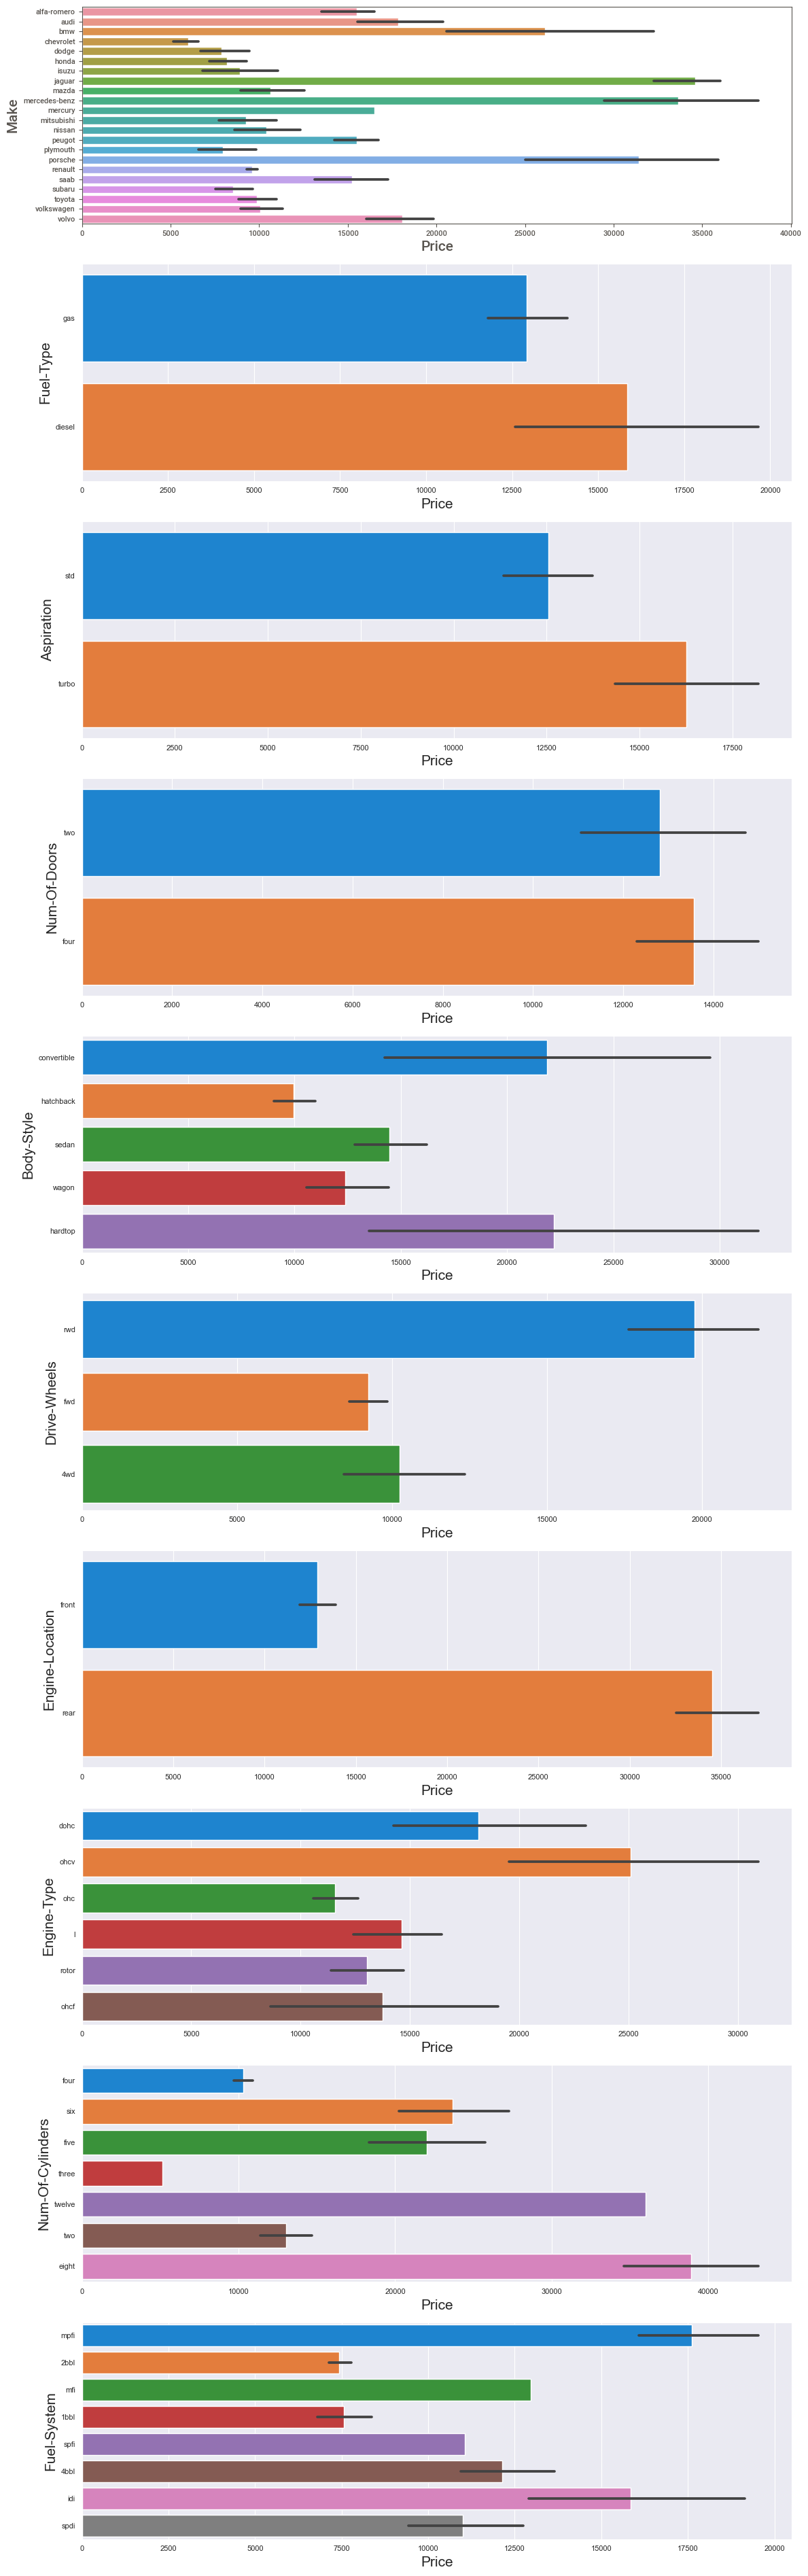

In [24]:
# Plotting how every  categorical feature correlate with the output column

plt.figure(figsize=(12,38), facecolor='white')#canvas size
plotnumber = 1#count variable

for column in cat_col:#for loop to acess columns form cat_col
    if plotnumber<=10 :#checking whether count variable is less than 10 or not
        ax = plt.subplot(10,1,plotnumber)#plotting 8 graphs in canvas(10 rows and 1 columns)
        sns.set_style("darkgrid")
        sns.barplot(data=df,x='Price',y=cat_col[column])#Plotting count plot
        
        
        plt.xlabel('Price',fontsize=15)#assigning name to x-axis and increasing it's font
        plt.ylabel(column,fontsize=15)#assigning name to y-axis and increasing it's font
        
    plotnumber+=1#increasing counter
plt.tight_layout()

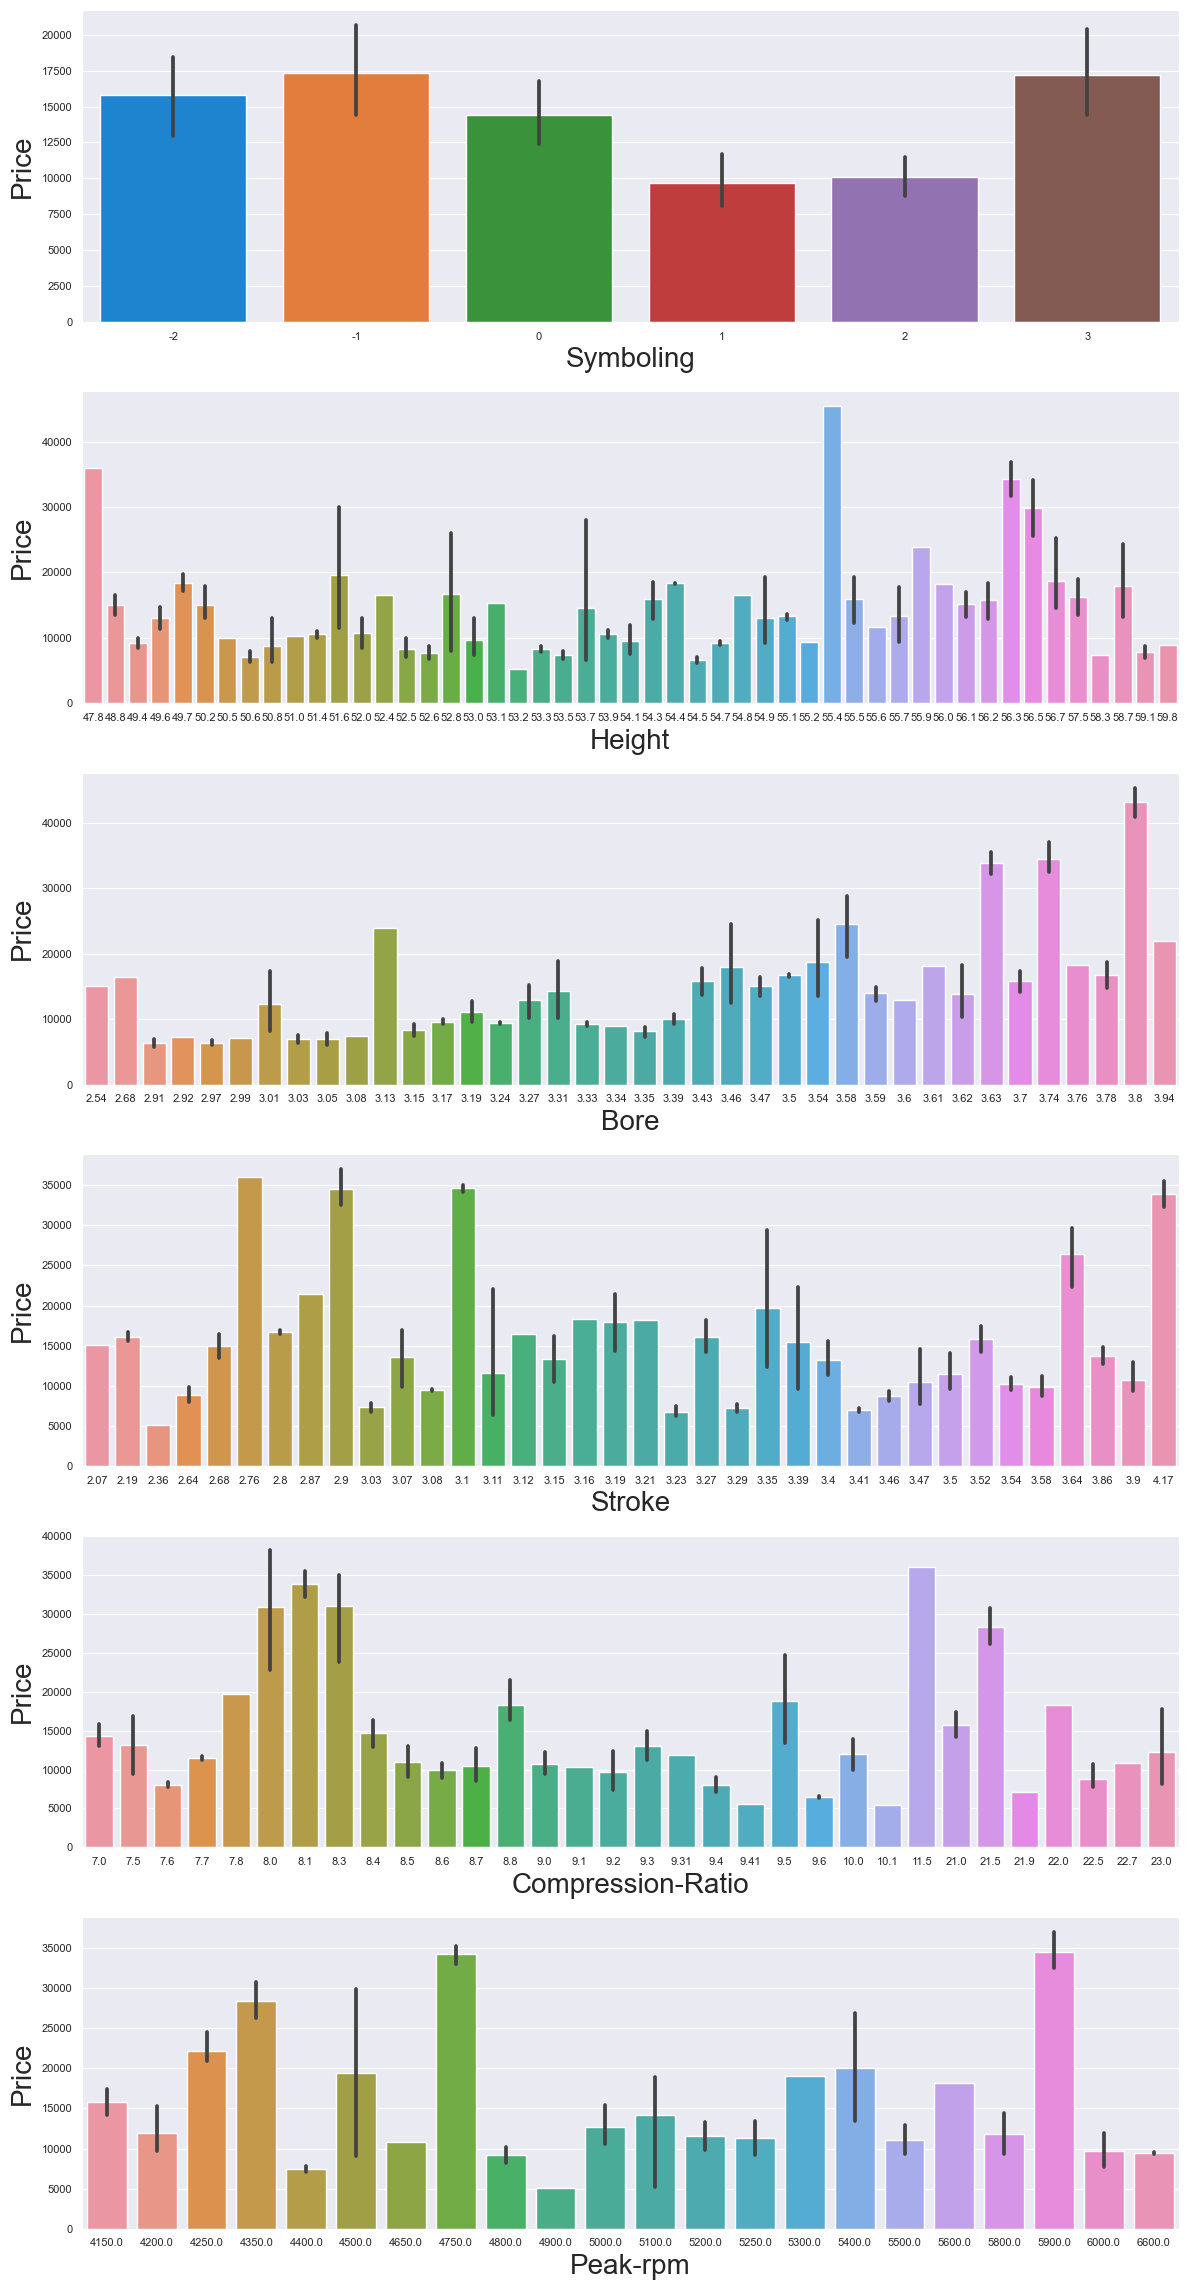

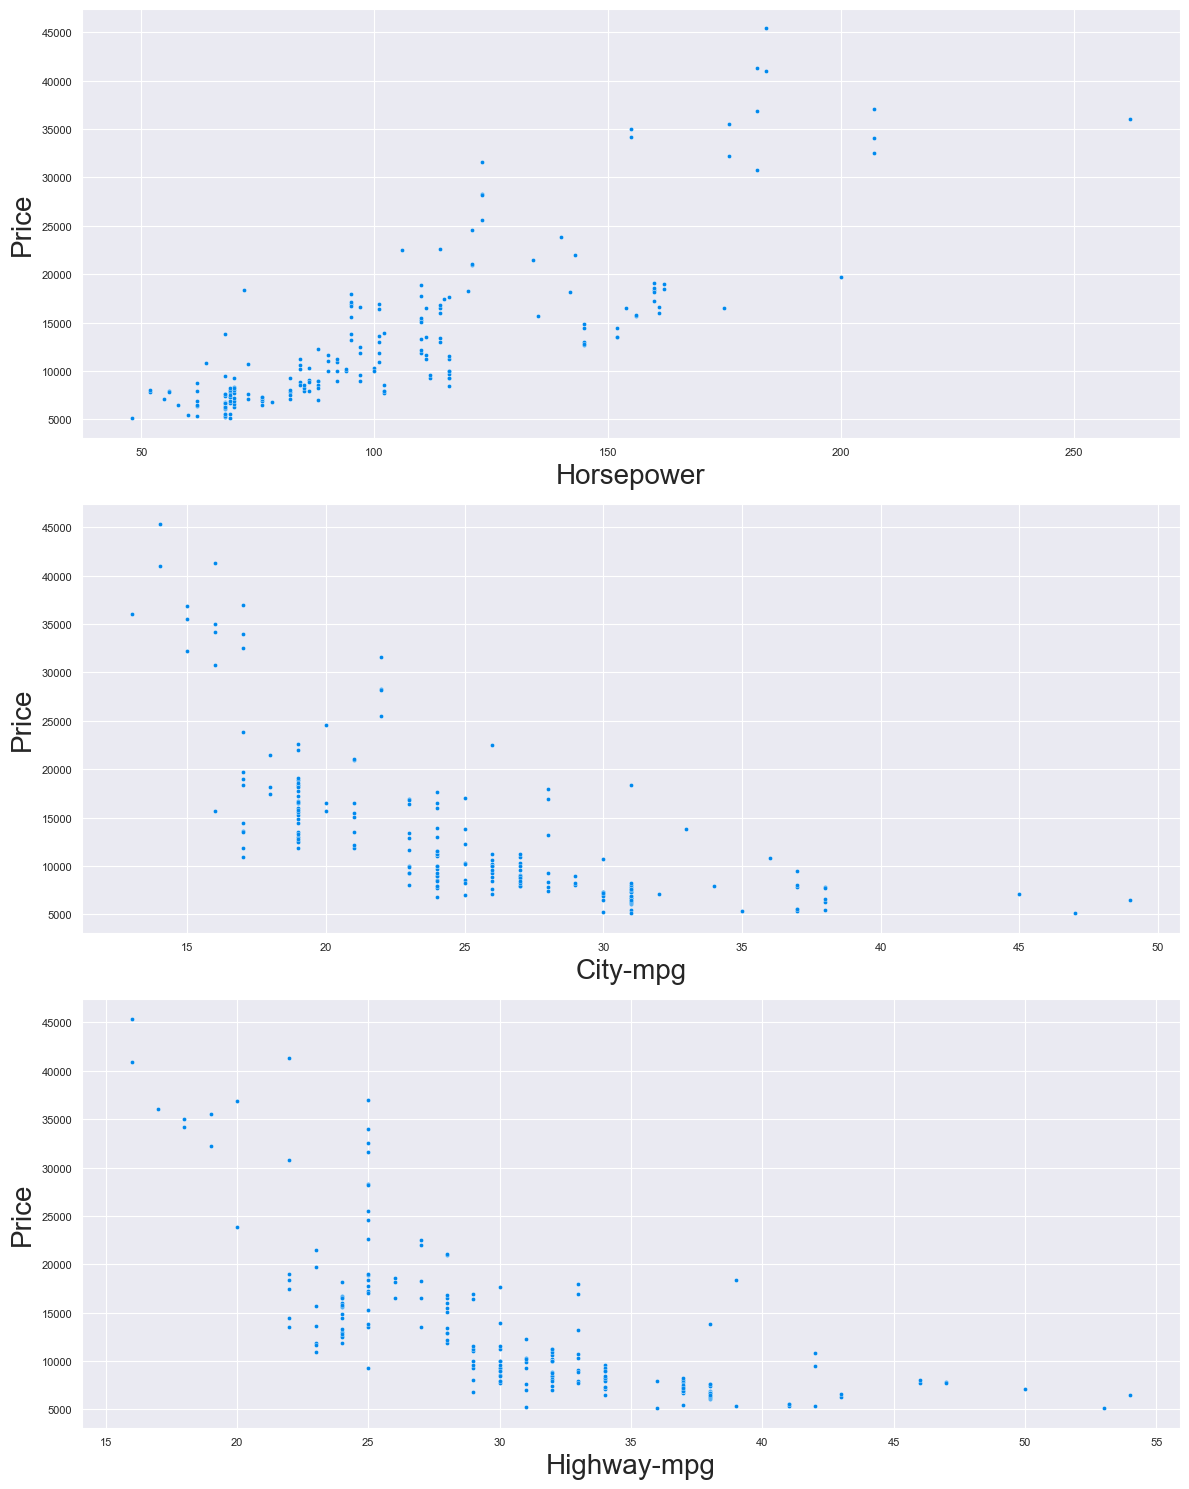

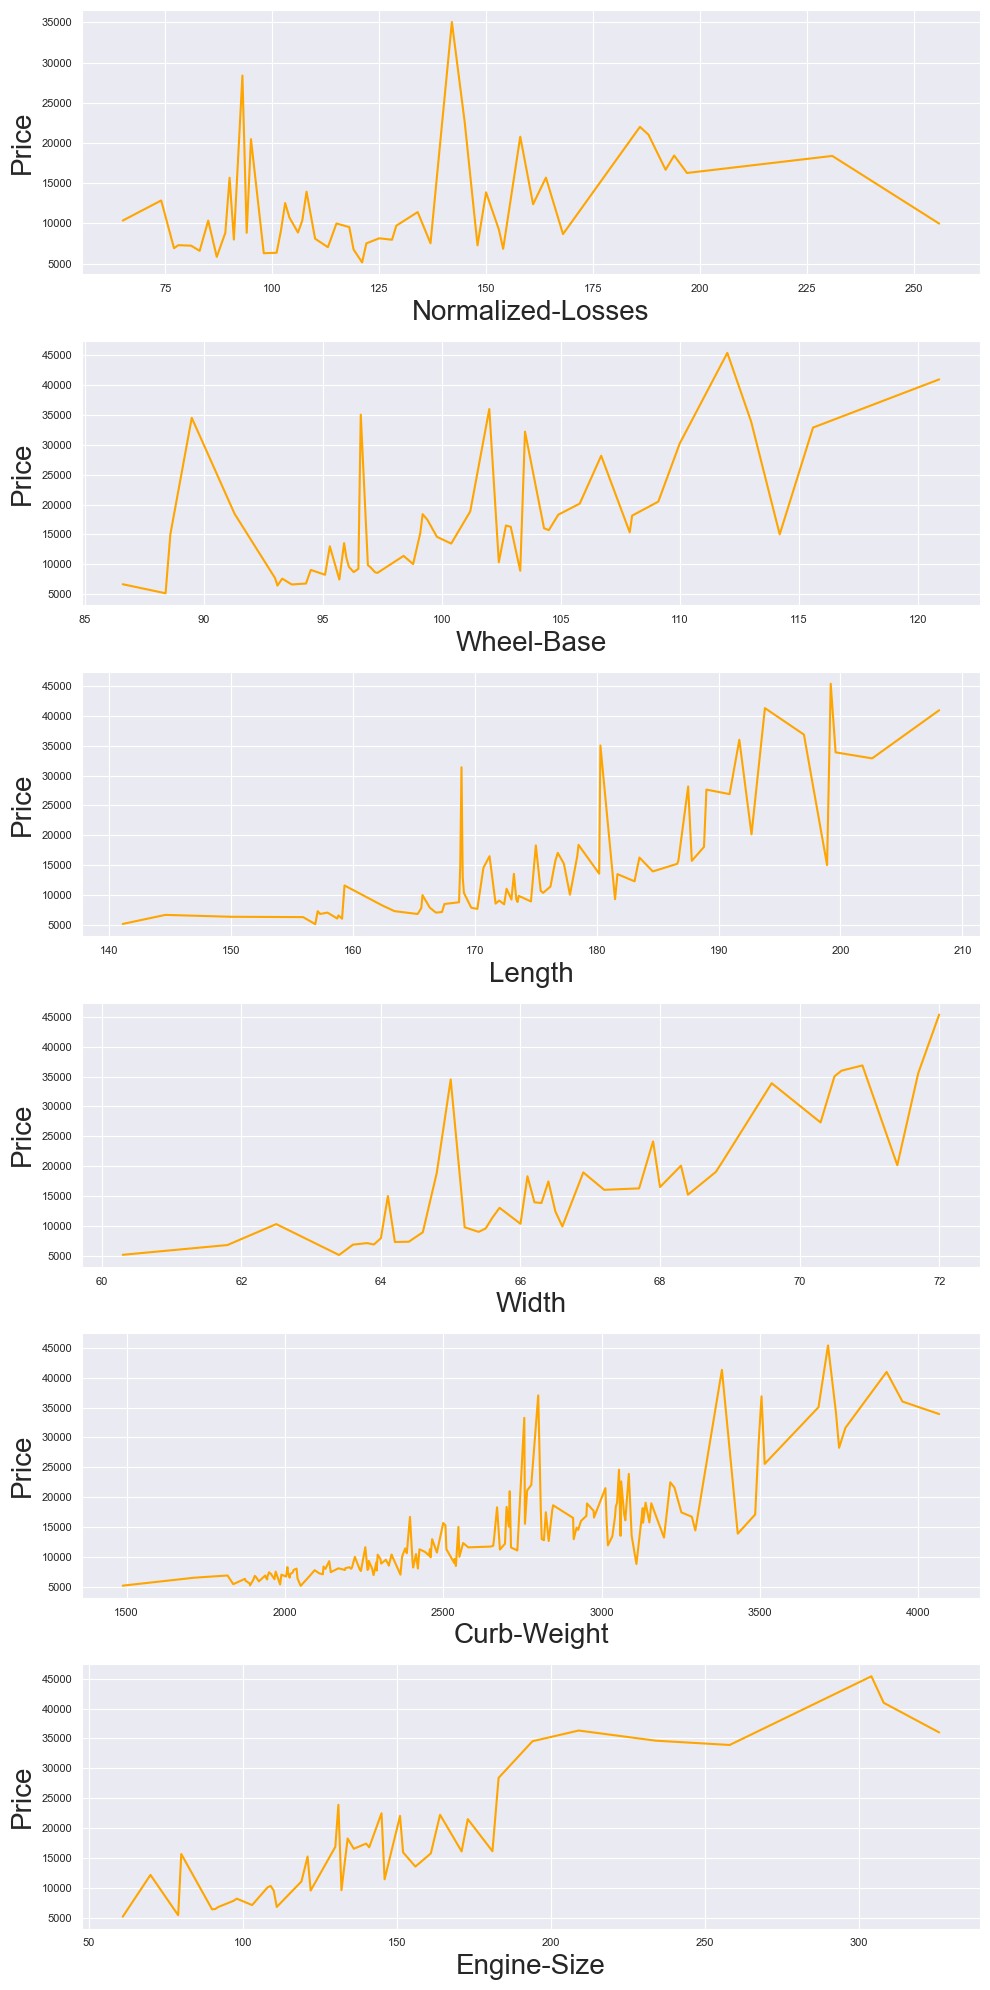

In [25]:
# Plotting how every  numerical feature correlate with the output column

#To create a dataframe

num_bar =num_col[["Symboling","Height","Bore","Stroke","Compression-Ratio","Peak-rpm"]]
num_sca =num_col[["Horsepower","City-mpg","Highway-mpg"]]
num_lin =num_col[["Normalized-Losses","Wheel-Base","Length","Width","Curb-Weight","Engine-Size",]]

#For Barplot 
plt.figure(figsize=(12,23), facecolor='white') #To set canvas
plotnumber = 1 #Counter

for columns in num_bar:
    if plotnumber<=6:
        ax = plt.subplot(6,1,plotnumber)
        sns.barplot(data=df,x=num_bar[columns],y="Price")
        plt.xlabel(columns,fontsize=20)
        plt.ylabel("Price",fontsize=20)
    plotnumber+=1
plt.tight_layout()

#For Scatterplot
plt.figure(figsize=(12,15), facecolor='white') #To set canvas
plotnumber = 1 #counter

for columns in num_sca:
    if plotnumber<=3:
        ax = plt.subplot(3,1,plotnumber)
        sns.scatterplot(data=df,x=num_sca[columns],y="Price")
        plt.xlabel(columns,fontsize=20)
        plt.ylabel("Price",fontsize=20)
    plotnumber+=1
plt.tight_layout()

#For lineplot
plt.figure(figsize=(10,20), facecolor='white') #To set canvas
plotnumber = 1 #counter

for columns in num_lin:
    if plotnumber<=6:
        ax = plt.subplot(6,1,plotnumber)
        sns.lineplot(data=df,x=num_lin[columns],y="Price",ci=None,color="orange")
        plt.xlabel(columns,fontsize=20)
        plt.ylabel("Price",fontsize=20)
    plotnumber+=1
plt.tight_layout()

***iii).Multivariate Analysis***        

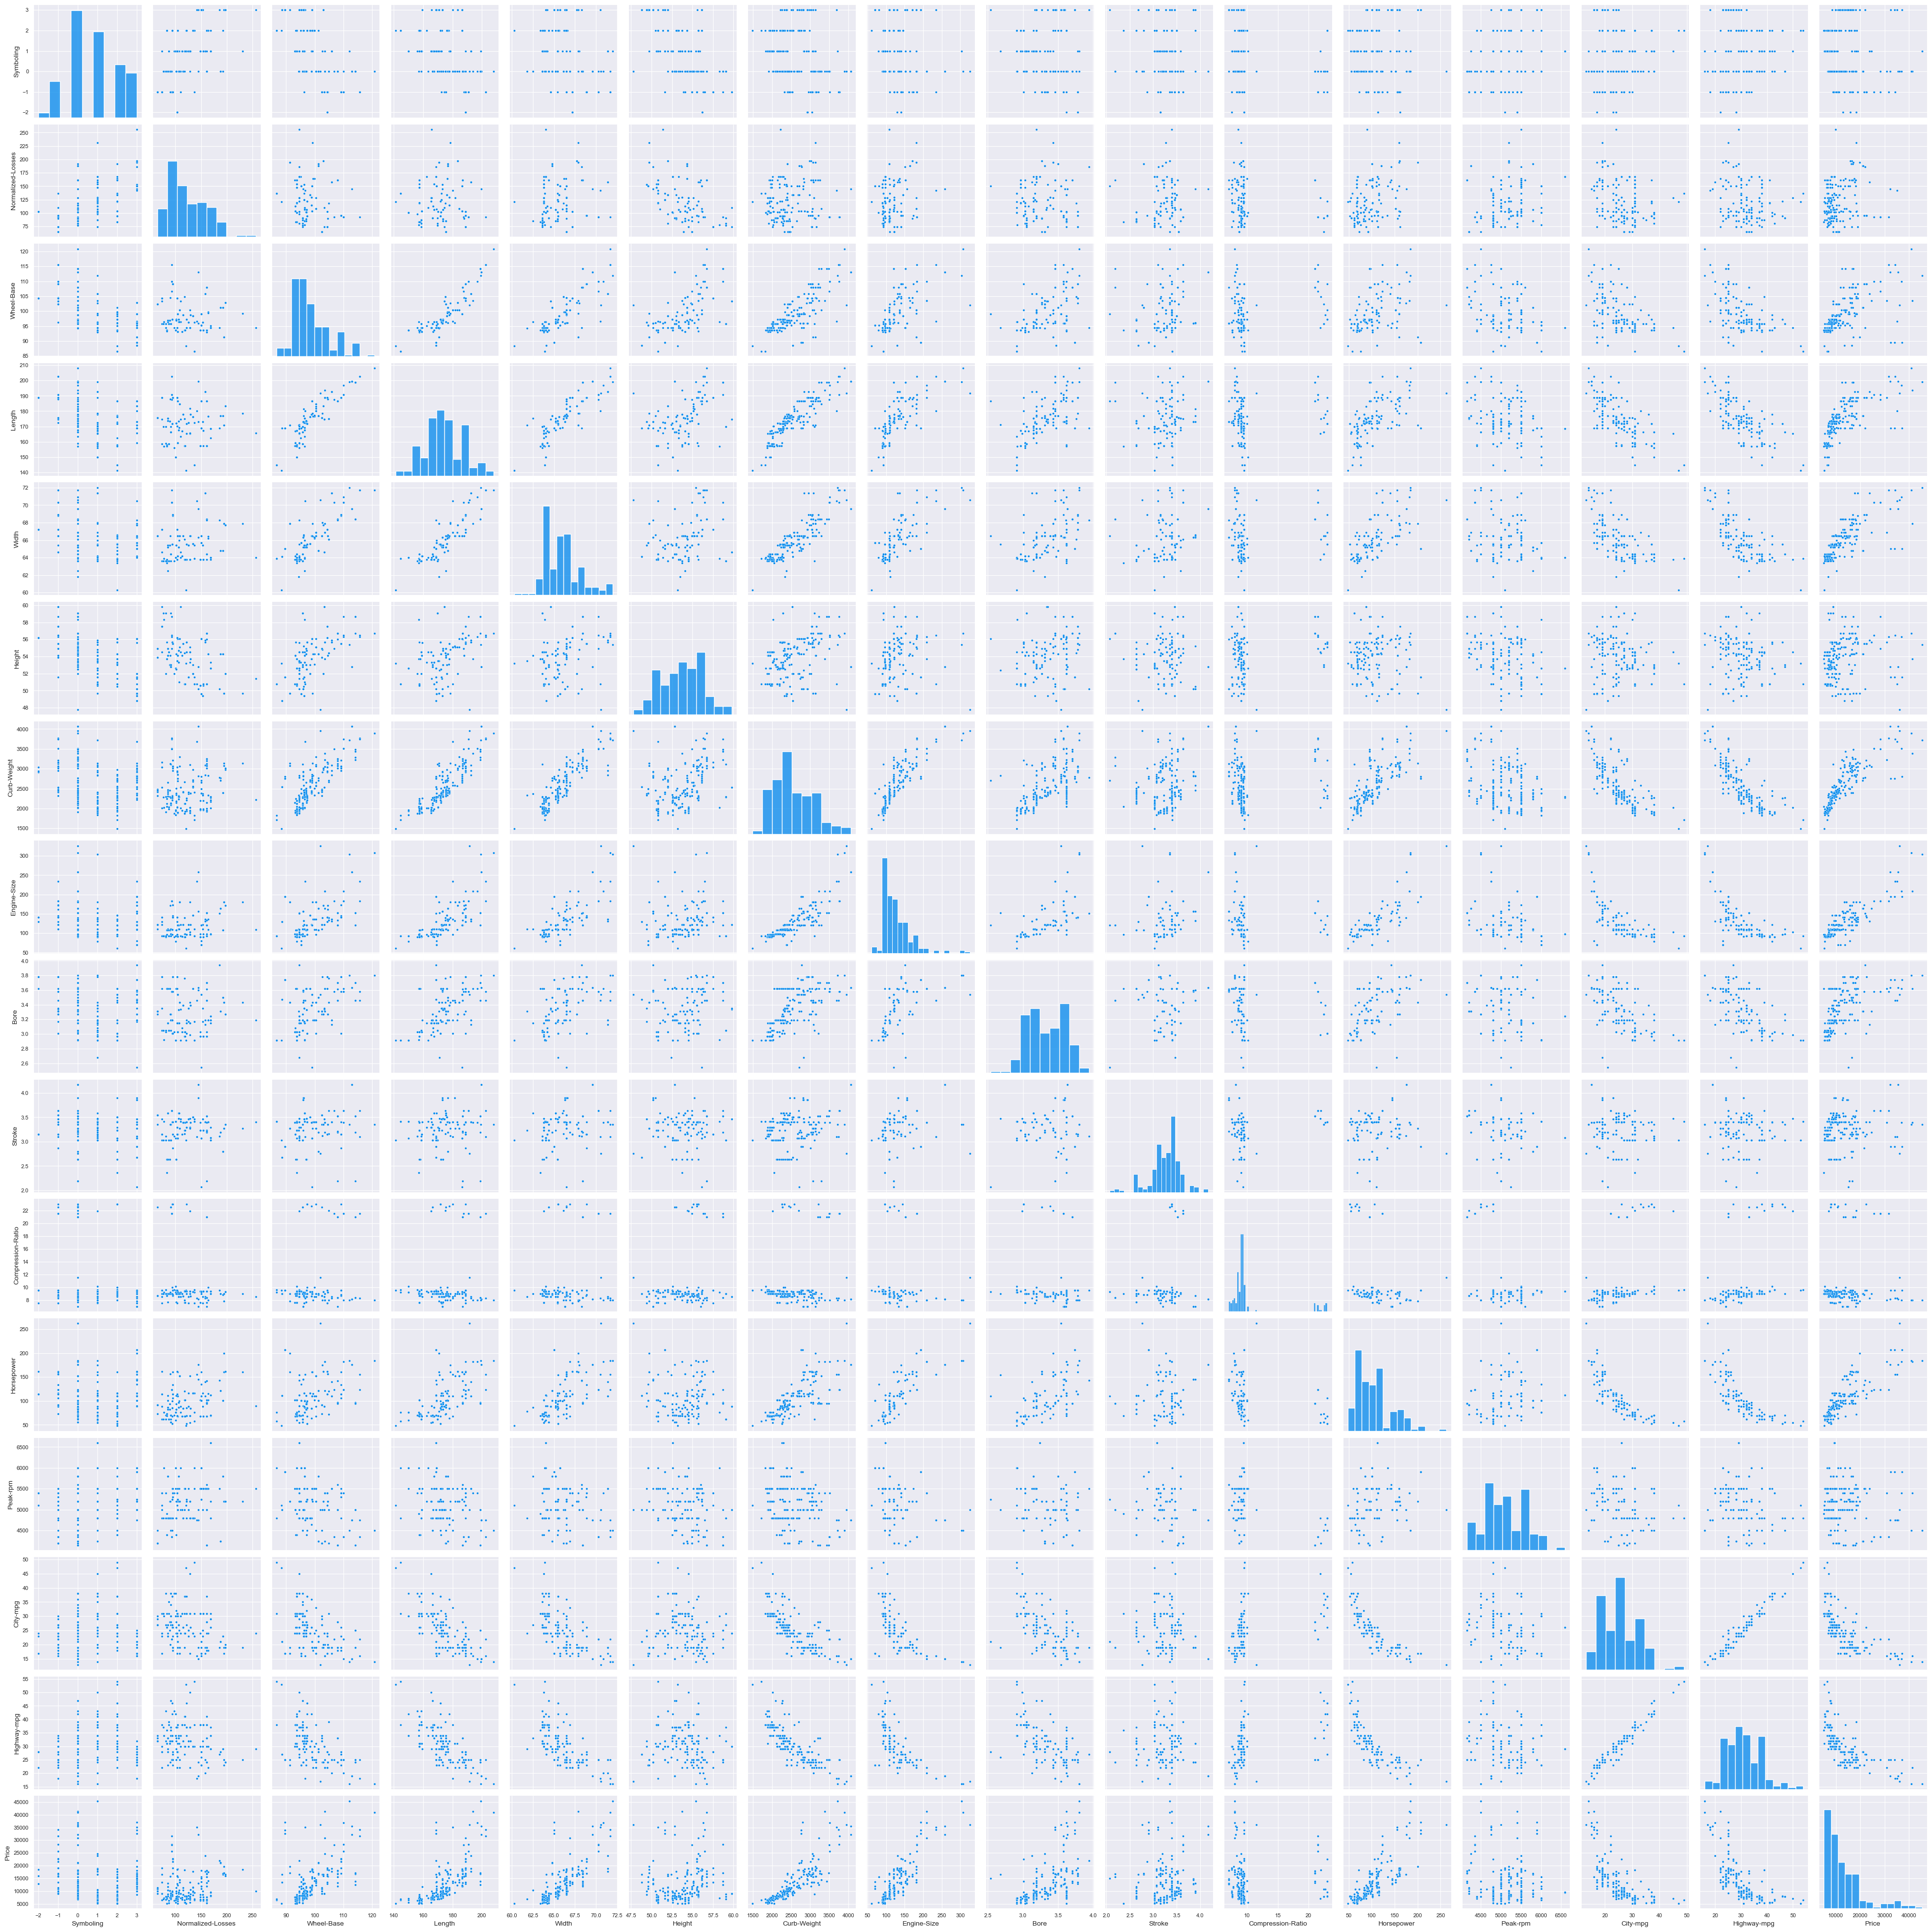

In [26]:

sns.pairplot(df) 
plt.show()

# 7.Data Preprocessing.

***i).Handling a missing values***

In dataset some columns has missing values:-Categorical col: **Num-Of-Doors** and Numerical col: **Normalized-Losses**,**Bore**,**Stroke**,**Horsepower**,**Peak-rpm**.

**Num-Of-Doors**

In [27]:
#To check datatype of a column

df['Num-Of-Doors'].dtypes # Object datatype

dtype('O')

In [28]:
#To find most repeated value

df['Num-Of-Doors'].value_counts()

Num-Of-Doors
four    113
two      86
Name: count, dtype: int64

In [29]:
#To cheak mode of a column

df['Num-Of-Doors'].mode()

0    four
Name: Num-Of-Doors, dtype: object

In [30]:
## Getting the rows where values are missed in Num-Of-Doors features

df.loc[df['Num-Of-Doors'].isnull()==True]

,Symboling,Normalized-Losses,Make,Fuel-Type,Aspiration,Num-Of-Doors,Body-Style,Drive-Wheels,Engine-Location,Wheel-Base,Length,Width,Height,Curb-Weight,Engine-Type,Num-Of-Cylinders,Engine-Size,Fuel-System,Bore,Stroke,Compression-Ratio,Horsepower,Peak-rpm,City-mpg,Highway-mpg,Price
26,1,148.0,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,157.3,63.8,50.6,2191,ohc,four,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558
60,0,NaN,mazda,diesel,std,NaN,sedan,fwd,front,98.8,177.8,66.5,55.5,2443,ohc,four,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795


In [31]:
#Imputing the missing value with mode()

df.loc[df['Num-Of-Doors'].isnull()==True,'Num-Of-Doors']='four'

In [32]:
#To cheak Null value

df['Num-Of-Doors'].isnull().sum()

0

**Normalized-Losses**

In [33]:
#To check datatype of a column

df['Normalized-Losses'].dtypes

dtype('float64')

In [34]:
#To find most repeated value

df['Normalized-Losses'].value_counts()

Normalized-Losses
161.0    11
91.0      8
150.0     7
128.0     6
134.0     6
104.0     6
95.0      5
102.0     5
103.0     5
74.0      5
85.0      5
168.0     5
94.0      5
65.0      5
106.0     4
122.0     4
148.0     4
118.0     4
93.0      4
101.0     3
125.0     3
137.0     3
154.0     3
83.0      3
115.0     3
119.0     2
87.0      2
194.0     2
197.0     2
108.0     2
89.0      2
164.0     2
158.0     2
145.0     2
192.0     2
188.0     2
81.0      2
110.0     2
113.0     2
129.0     2
153.0     2
107.0     1
78.0      1
186.0     1
231.0     1
77.0      1
98.0      1
121.0     1
90.0      1
142.0     1
256.0     1
Name: count, dtype: int64

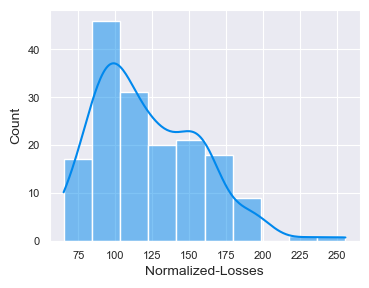

Skewness of the column: 0.7659764175950632


In [35]:
## Histogram since it has numerical value

plt.figure(figsize=(4,3))
sns.histplot(data=df,x='Normalized-Losses',kde=True)
plt.show()
print("Skewness of the column:",df['Normalized-Losses'].skew())

Insight: Column has right skewed data replace NaN values from median value.

In [36]:
# Check median value for Normalized-Losses column.

df['Normalized-Losses'].median()

115.0

In [37]:
#To make all column value is NaN

df.loc[df['Normalized-Losses'].isnull()==True]

,Symboling,Normalized-Losses,Make,Fuel-Type,Aspiration,Num-Of-Doors,Body-Style,Drive-Wheels,Engine-Location,Wheel-Base,Length,Width,Height,Curb-Weight,Engine-Type,Num-Of-Cylinders,Engine-Size,Fuel-System,Bore,Stroke,Compression-Ratio,Horsepower,Peak-rpm,City-mpg,Highway-mpg,Price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920
13,1,NaN,bmw,gas,std,four,sedan,rwd,front,103.5,189.0,66.9,55.7,3055,ohc,six,164,mpfi,3.31,3.19,9.0,121.0,4250.0,20,25,24565
14,0,NaN,bmw,gas,std,four,sedan,rwd,front,103.5,189.0,66.9,55.7,3230,ohc,six,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,30760
15,0,NaN,bmw,gas,std,two,sedan,rwd,front,103.5,193.8,67.9,53.7,3380,ohc,six,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,41315
16,0,NaN,bmw,gas,std,four,sedan,rwd,front,110.0,197.0,70.9,56.3,3505,ohc,six,209,mpfi,3.62,3.39,8.0,182.0,5400.0,15,20,36880
42,0,NaN,isuzu,gas,std,four,sedan,rwd,front,94.3,170.7,61.8,53.5,2337,ohc,four,111,2bbl,3.31,3.23,8.5,78.0,4800.0,24,29,6785


In [38]:
#Imputting the missing values with median

df.loc[df['Normalized-Losses'].isnull()==True,'Normalized-Losses']=df['Normalized-Losses'].median()

In [39]:
#To check null values.

df['Normalized-Losses'].isnull().sum()

0

**Bore**

In [40]:
#To check datatypes of column

df['Bore'].dtypes

dtype('float64')

In [41]:
#To check value counts of a column

df['Bore'].value_counts

<bound method IndexOpsMixin.value_counts of 0      3.47
1      3.47
2      2.68
3      3.19
4      3.19
5      3.19
6      3.19
7      3.19
8      3.13
9      3.50
10     3.50
11     3.31
12     3.31
13     3.31
14     3.62
15     3.62
16     3.62
17     2.91
18     3.03
19     3.03
20     2.97
21     2.97
22     3.03
23     2.97
24     2.97
25     2.97
26     3.03
27     3.34
28     3.60
29     2.91
30     2.91
31     2.91
32     2.91
33     2.91
34     2.91
35     2.92
36     3.15
37     3.15
38     3.15
39     3.15
40     3.15
41     3.15
42     3.31
43     3.43
44     3.63
45     3.63
46     3.54
47     3.03
48     3.03
49     3.03
50     3.03
51     3.08
52      NaN
53      NaN
54      NaN
55      NaN
56     3.39
57     3.39
58     3.39
59     3.39
60     3.39
61     3.39
62     3.76
63     3.43
64     3.58
65     3.58
66     3.58
67     3.58
68     3.46
69     3.46
70     3.80
71     3.80
72     3.78
73     2.97
74     2.97
75     2.97
76     3.03
77     3.17
78     3.35
79     3

In [42]:
#Present null values

df['Bore'].isnull().sum()

4

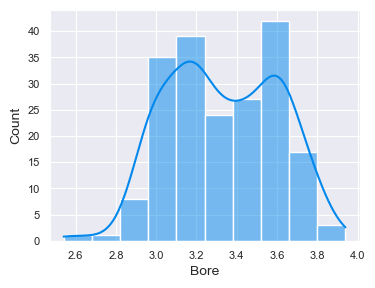

Skewness of the column: -0.032621687025684624


In [43]:
## Histogram since it has numerical value

plt.figure(figsize=(4,3))
sns.histplot(data=df,x='Bore',kde=True)
plt.show()
print("Skewness of the column:",df['Bore'].skew())

Insight:- Column has left skewed data replace NaN values with median value.

In [44]:
#To check median value

df['Bore'].median()

3.31

In [45]:
#To use pandas fillna function

df['Bore'].fillna(df['Bore'].median(),inplace=True)

In [46]:
# To check null values
df['Bore'].isnull().sum()

0

**Stroke**

In [47]:
#To check data type of column

df['Stroke'].dtypes

dtype('float64')

In [48]:
#To check vlaue counts

df['Stroke'].value_counts

<bound method IndexOpsMixin.value_counts of 0      2.68
1      2.68
2      3.47
3      3.40
4      3.40
5      3.40
6      3.40
7      3.40
8      3.40
9      2.80
10     2.80
11     3.19
12     3.19
13     3.19
14     3.39
15     3.39
16     3.39
17     3.03
18     3.11
19     3.11
20     3.23
21     3.23
22     3.39
23     3.23
24     3.23
25     3.23
26     3.39
27     3.46
28     3.90
29     3.41
30     3.41
31     3.07
32     3.41
33     3.41
34     3.41
35     3.41
36     3.58
37     3.58
38     3.58
39     3.58
40     3.58
41     3.58
42     3.23
43     3.23
44     4.17
45     4.17
46     2.76
47     3.15
48     3.15
49     3.15
50     3.15
51     3.15
52      NaN
53      NaN
54      NaN
55      NaN
56     3.39
57     3.39
58     3.39
59     3.39
60     3.39
61     3.39
62     3.16
63     3.64
64     3.64
65     3.64
66     3.64
67     3.64
68     3.10
69     3.10
70     3.35
71     3.35
72     3.12
73     3.23
74     3.23
75     3.23
76     3.39
77     3.46
78     3.46
79     3

In [49]:
#Present null values

df['Stroke'].isnull().sum()

4

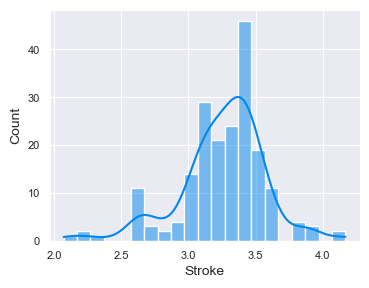

Skewness of the column: -0.6937783864438527


In [50]:
## Histogram since it has numerical value

plt.figure(figsize=(4,3))
sns.histplot(data=df,x='Stroke',kde=True)
plt.show()
print("Skewness of the column:",df['Stroke'].skew())

Insight:-Column has a left skewed data replace NaN value with median value.

In [51]:
#To check median vlaues

df['Stroke'].median()

3.29

In [52]:
#To use pandas fillna function

df['Stroke'].fillna(df['Stroke'].median(),inplace=True)

In [53]:
#To check null values
df['Stroke'].isnull().sum()

0

**Horsepower**

In [54]:
#To check data type of column

df['Horsepower'].dtypes

dtype('float64')

In [55]:
#To check value counts of a column

df['Horsepower'].value_counts

<bound method IndexOpsMixin.value_counts of 0      111.0
1      111.0
2      154.0
3      102.0
4      115.0
5      110.0
6      110.0
7      110.0
8      140.0
9      101.0
10     101.0
11     121.0
12     121.0
13     121.0
14     182.0
15     182.0
16     182.0
17      48.0
18      70.0
19      70.0
20      68.0
21      68.0
22     102.0
23      68.0
24      68.0
25      68.0
26     102.0
27      88.0
28     145.0
29      58.0
30      76.0
31      60.0
32      76.0
33      76.0
34      76.0
35      76.0
36      86.0
37      86.0
38      86.0
39      86.0
40     101.0
41     100.0
42      78.0
43      90.0
44     176.0
45     176.0
46     262.0
47      68.0
48      68.0
49      68.0
50      68.0
51      68.0
52     101.0
53     101.0
54     101.0
55     135.0
56      84.0
57      84.0
58      84.0
59      84.0
60      64.0
61      84.0
62     120.0
63      72.0
64     123.0
65     123.0
66     123.0
67     123.0
68     155.0
69     155.0
70     184.0
71     184.0
72     175.0
73     

In [56]:
#Present null values

df['Horsepower'].isnull().sum()

2

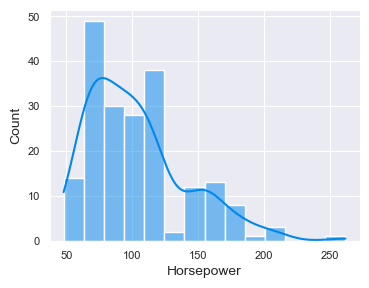

Skewness of the column: 1.1415842841631443


In [57]:
## Histogram since it has numerical value

plt.figure(figsize=(4,3))
sns.histplot(data=df,x='Horsepower',kde=True)
plt.show()
print("Skewness of the column:",df['Horsepower'].skew())

Insight:-Column has a right skewed data replace NaN value with median value.

In [58]:
#To check median vlaues

df['Horsepower'].median()

95.0

In [59]:
# To use pandas fillna function

df['Horsepower'].fillna(df['Horsepower'].median(),inplace=True)

In [60]:
#To check null values
df['Horsepower'].isnull().sum()

0

**Peak-rpm**

In [61]:
#To check data type of column

df['Peak-rpm'].dtypes

dtype('float64')

In [62]:
#To check value counts of a column

df['Peak-rpm'].value_counts

<bound method IndexOpsMixin.value_counts of 0      5000.0
1      5000.0
2      5000.0
3      5500.0
4      5500.0
5      5500.0
6      5500.0
7      5500.0
8      5500.0
9      5800.0
10     5800.0
11     4250.0
12     4250.0
13     4250.0
14     5400.0
15     5400.0
16     5400.0
17     5100.0
18     5400.0
19     5400.0
20     5500.0
21     5500.0
22     5500.0
23     5500.0
24     5500.0
25     5500.0
26     5500.0
27     5000.0
28     5000.0
29     4800.0
30     6000.0
31     5500.0
32     6000.0
33     6000.0
34     6000.0
35     6000.0
36     5800.0
37     5800.0
38     5800.0
39     5800.0
40     5800.0
41     5500.0
42     4800.0
43     5000.0
44     4750.0
45     4750.0
46     5000.0
47     5000.0
48     5000.0
49     5000.0
50     5000.0
51     5000.0
52     6000.0
53     6000.0
54     6000.0
55     6000.0
56     4800.0
57     4800.0
58     4800.0
59     4800.0
60     4650.0
61     4800.0
62     5000.0
63     4200.0
64     4350.0
65     4350.0
66     4350.0
67     4350.0
68  

In [63]:
#Present null values

df['Peak-rpm'].isnull().sum()

2

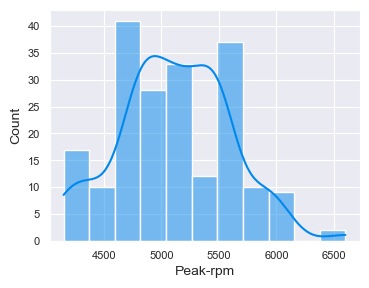

Skewness of the column: 0.10772928657030856


In [64]:
## Histogram since it has numerical value

plt.figure(figsize=(4,3))
sns.histplot(data=df,x='Peak-rpm',kde=True)
plt.show()
print("Skewness of the column:",df['Peak-rpm'].skew())

Insight:-Column has a left skewed data replace NaN value with median value.

In [65]:
#To check median vlaues

df['Peak-rpm'].median()

5200.0

In [66]:
#To use pandas fillna function

df['Peak-rpm'].fillna(df['Peak-rpm'].median(),inplace=True)

In [67]:
#To check null values
df['Peak-rpm'].isnull().sum()

0

In [68]:
df.isnull().sum()

Symboling            0
Normalized-Losses    0
Make                 0
Fuel-Type            0
Aspiration           0
Num-Of-Doors         0
Body-Style           0
Drive-Wheels         0
Engine-Location      0
Wheel-Base           0
Length               0
Width                0
Height               0
Curb-Weight          0
Engine-Type          0
Num-Of-Cylinders     0
Engine-Size          0
Fuel-System          0
Bore                 0
Stroke               0
Compression-Ratio    0
Horsepower           0
Peak-rpm             0
City-mpg             0
Highway-mpg          0
Price                0
dtype: int64

***ii).Handling Outliers***

In [69]:
#To handle outliers only on numerical columns

num_col.columns

Index(['Symboling', 'Normalized-Losses', 'Wheel-Base', 'Length', 'Width',
       'Height', 'Curb-Weight', 'Engine-Size', 'Bore', 'Stroke',
       'Compression-Ratio', 'Horsepower', 'Peak-rpm', 'City-mpg',
       'Highway-mpg', 'Price'],
      dtype='object')

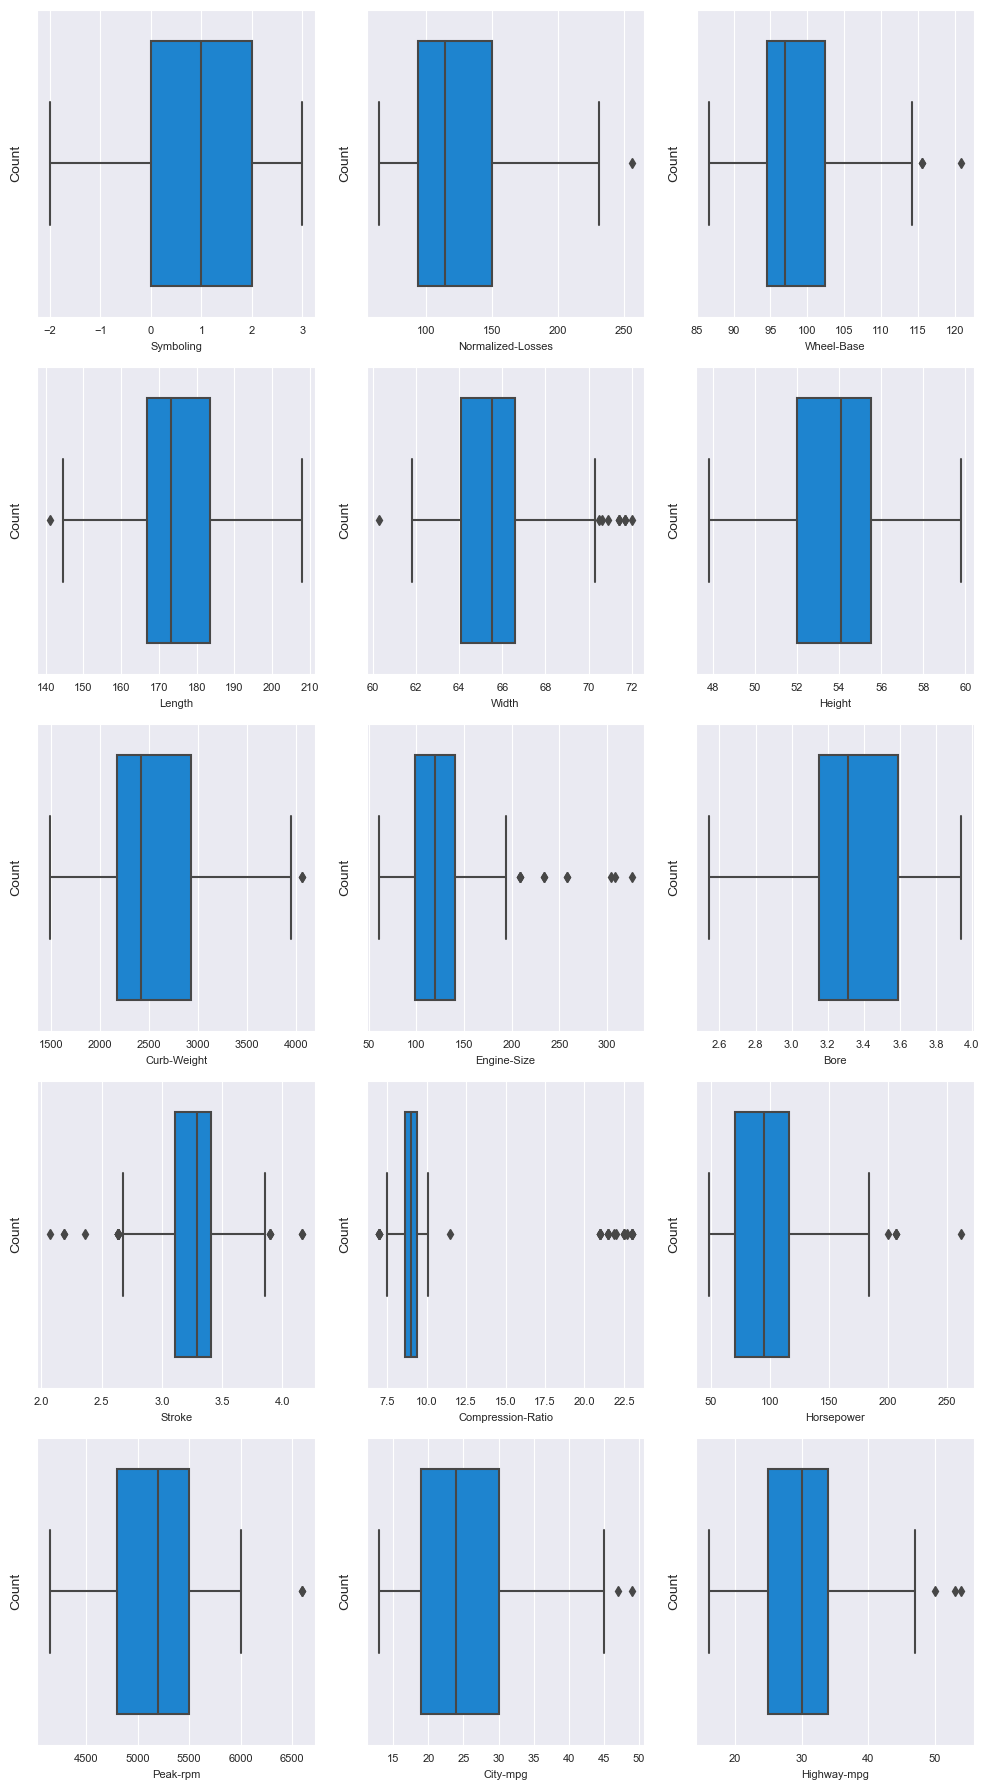

In [70]:
# check outliers.

plt.figure(figsize=(10,18),facecolor='white')
plotnumber=1 # Initialize count
for column in num_col.drop(columns=["Price"],axis=1):
    if plotnumber < 16:# Total no.of column of range (1 to 16)
        ax=plt.subplot(5,3,plotnumber) # It mention rows and column in canva
        sns.boxplot(x=num_col[column])
        plt.xlabel(column,fontsize=8)
        plt.ylabel("Count",fontsize=10)
    plotnumber +=1
plt.tight_layout() # Fit Your Plot Properly.

Insight:-

Here we found outliers in **'Normalized-Losses'**, **'Wheel-Base'**, **'Length'**, **'Width'**,**'Curb-Weight'**, **'Engine-Size'**,**'Stroke'**,**'Compression-Ratio'**, **'Horsepower'**, **'Peak-rpm'**, **'City-mpg'**,**'Highway-mpg'**.
       
       

1 Symboling
  Skewness is: 0.19737036029756264


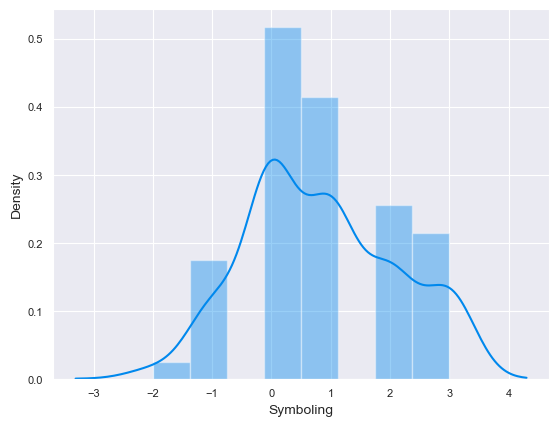

2 Normalized-Losses
  Skewness is: 0.7659764175950632


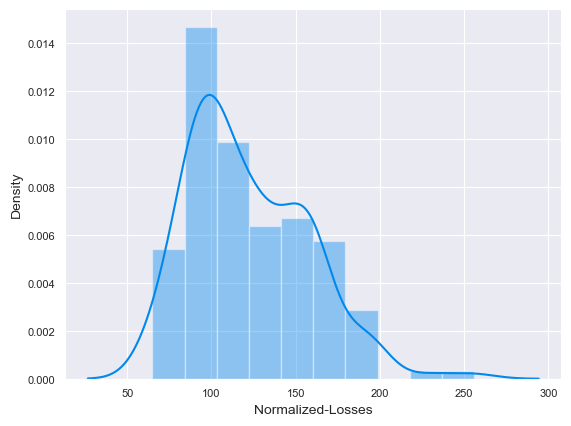

3 Wheel-Base
  Skewness is: 1.0312614426719533


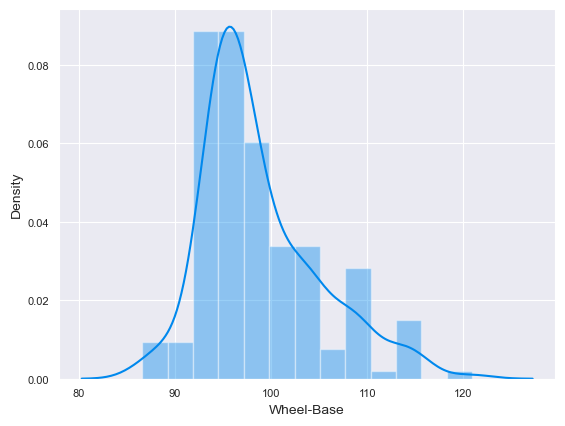

4 Length
  Skewness is: 0.15444635183586677


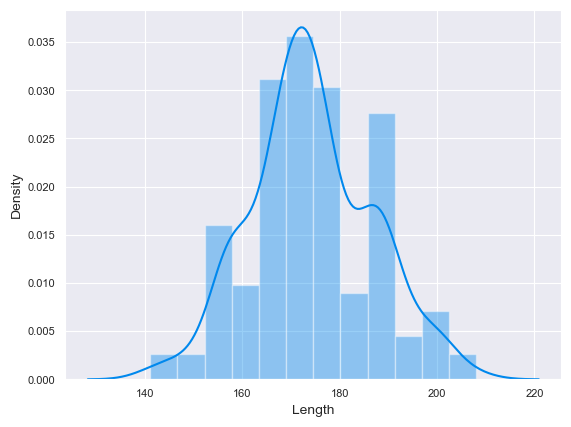

5 Width
  Skewness is: 0.8750290419412816


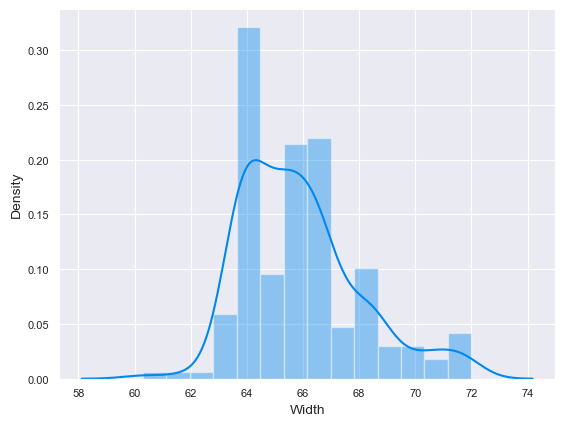

6 Height
  Skewness is: 0.029173299149270183


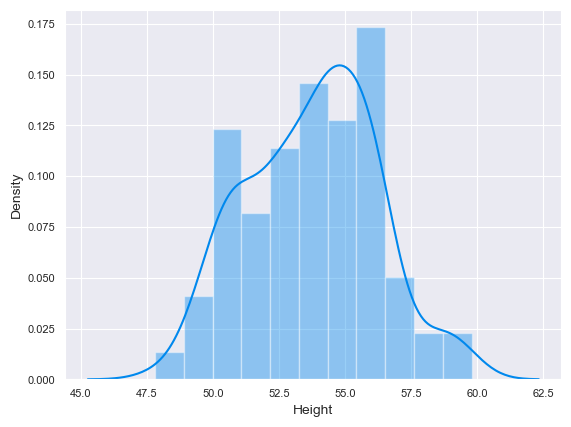

7 Curb-Weight
  Skewness is: 0.7058035875297635


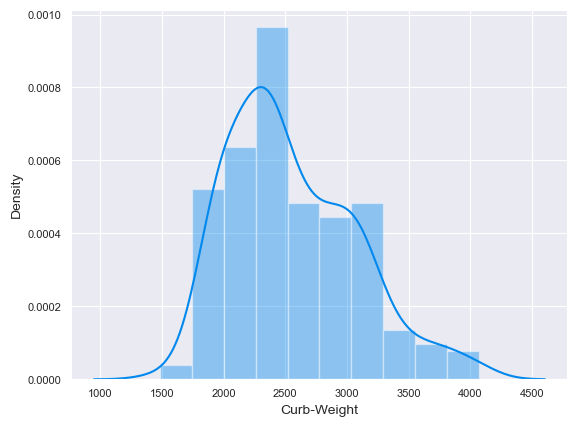

8 Engine-Size
  Skewness is: 1.9791441966363523


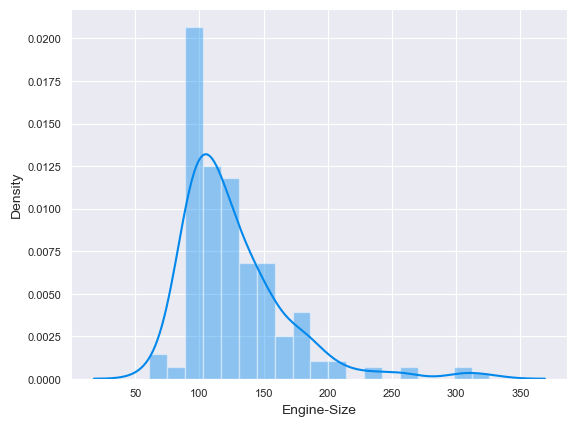

9 Bore
  Skewness is: -0.032621687025684624


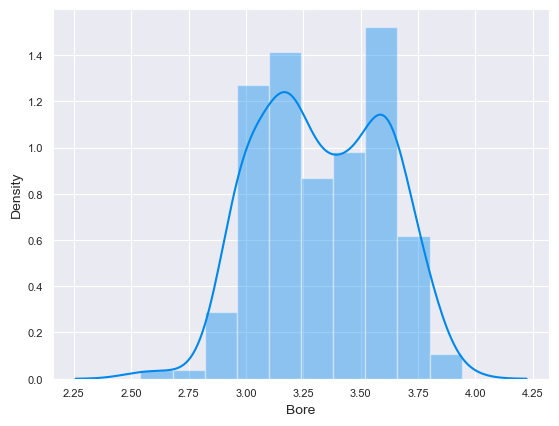

10 Stroke
  Skewness is: -0.6937783864438527


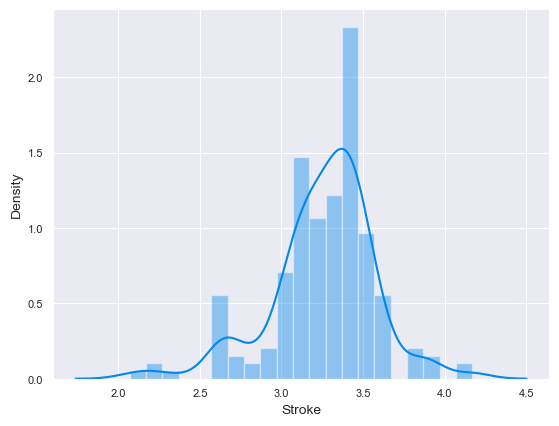

11 Compression-Ratio
  Skewness is: 2.5844624326120726


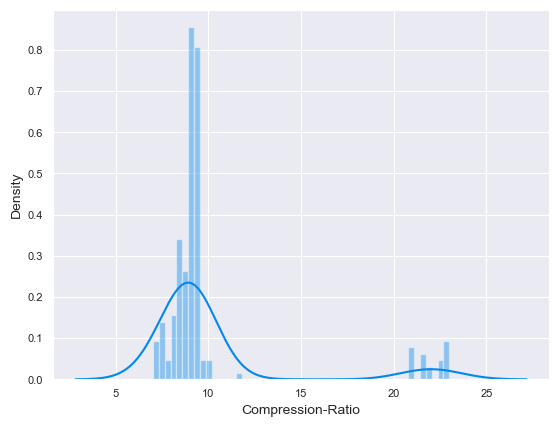

12 Horsepower
  Skewness is: 1.1415842841631443


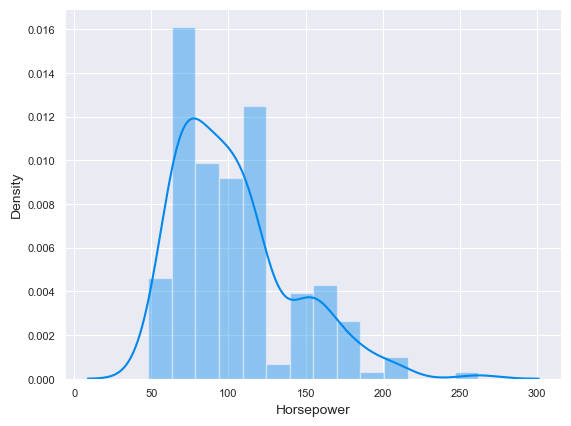

13 Peak-rpm
  Skewness is: 0.10772928657030856


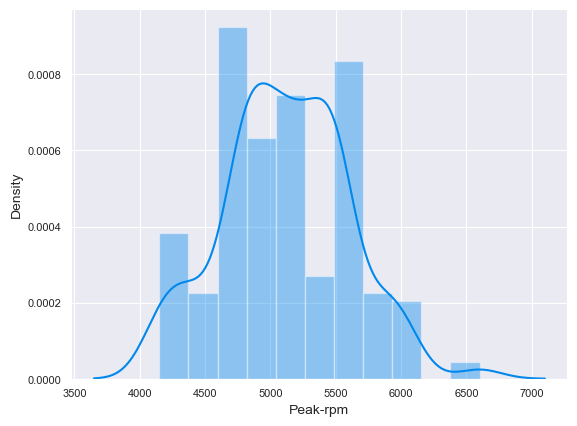

14 City-mpg
  Skewness is: 0.6804334707346078


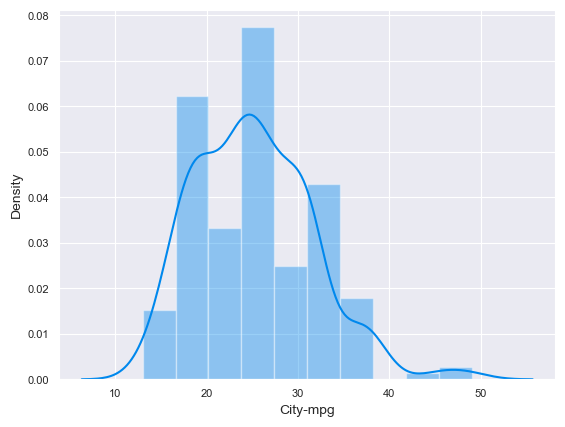

15 Highway-mpg
  Skewness is: 0.5495071459179158


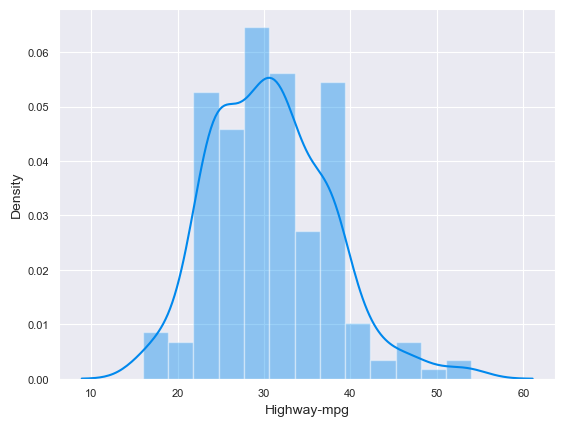

In [71]:
# To check skewness of a columns

j=1
for i in num_col.drop(columns=["Price"]):
    print(j,i)
    print("  Skewness is:", num_col[i].skew())
    
    plt.figure()
    sns.distplot(num_col[i])
    plt.show()
    j+=1

***Normalized-Losses (Right skew)***

In [72]:
#Basic info about column
df["Normalized-Losses"].describe()

count    201.000000
mean     120.711443
std       32.111623
min       65.000000
25%      101.000000
50%      115.000000
75%      137.000000
max      256.000000
Name: Normalized-Losses, dtype: float64

In [73]:
# To find Q1 and Q3.
# To calculate quantiles using quantile().

Q1=df['Normalized-Losses'].quantile(0.25) # 25%
print("lower_quantile",Q1)

Q3=df['Normalized-Losses'].quantile(0.75) # 75%
print("upper_quantile",Q3)


lower_quantile 101.0
upper_quantile 137.0


In [74]:
# To Find IQR.

IQR=Q3-Q1
IQR

36.0

In [75]:
# To find lower limit and upper limit

lower_limit=Q1-1.5*IQR
print("lower_limit",lower_limit)

upper_limit=Q3+1.5*IQR
print("upper_limit",upper_limit)

lower_limit 47.0
upper_limit 191.0


In [76]:
# To find value above upper_limit.

df.loc[df['Normalized-Losses']>upper_limit] 

,Symboling,Normalized-Losses,Make,Fuel-Type,Aspiration,Num-Of-Doors,Body-Style,Drive-Wheels,Engine-Location,Wheel-Base,Length,Width,Height,Curb-Weight,Engine-Type,Num-Of-Cylinders,Engine-Size,Fuel-System,Bore,Stroke,Compression-Ratio,Horsepower,Peak-rpm,City-mpg,Highway-mpg,Price
9,2,192.0,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.8,101.0,5800.0,23,29,16430
10,0,192.0,bmw,gas,std,four,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.8,101.0,5800.0,23,29,16925
101,3,194.0,nissan,gas,std,two,hatchback,rwd,front,91.3,170.7,67.9,49.7,3071,ohcv,six,181,mpfi,3.43,3.27,9.0,160.0,5200.0,19,25,17199
102,3,194.0,nissan,gas,turbo,two,hatchback,rwd,front,91.3,170.7,67.9,49.7,3139,ohcv,six,181,mpfi,3.43,3.27,7.8,200.0,5200.0,17,23,19699
103,1,231.0,nissan,gas,std,two,hatchback,rwd,front,99.2,178.5,67.9,49.7,3139,ohcv,six,181,mpfi,3.43,3.27,9.0,160.0,5200.0,19,25,18399
174,3,197.0,toyota,gas,std,two,hatchback,rwd,front,102.9,183.5,67.7,52.0,2976,dohc,six,171,mpfi,3.27,3.35,9.3,161.0,5200.0,20,24,16558
175,3,197.0,toyota,gas,std,two,hatchback,rwd,front,102.9,183.5,67.7,52.0,3016,dohc,six,171,mpfi,3.27,3.35,9.3,161.0,5200.0,19,24,15998
186,3,256.0,volkswagen,gas,std,two,hatchback,fwd,front,94.5,165.7,64.0,51.4,2221,ohc,four,109,mpfi,3.19,3.40,8.5,90.0,5500.0,24,29,9980


In [77]:
# To find percentage of outliers.

len(df.loc[df['Normalized-Losses']>upper_limit] )/len(df)

0.03980099502487562

In [78]:
# To find value below lower_limit.

df.loc[df['Normalized-Losses']<lower_limit] # There are no data in lower limit.

,Symboling,Normalized-Losses,Make,Fuel-Type,Aspiration,Num-Of-Doors,Body-Style,Drive-Wheels,Engine-Location,Wheel-Base,Length,Width,Height,Curb-Weight,Engine-Type,Num-Of-Cylinders,Engine-Size,Fuel-System,Bore,Stroke,Compression-Ratio,Horsepower,Peak-rpm,City-mpg,Highway-mpg,Price


In [79]:
#To replace outliers with median value
df.loc[df['Normalized-Losses']>upper_limit,"Normalized-Losses"]=df['Normalized-Losses'].median()


In [80]:
# To check outlier.

df.loc[df['Normalized-Losses']>upper_limit] 

,Symboling,Normalized-Losses,Make,Fuel-Type,Aspiration,Num-Of-Doors,Body-Style,Drive-Wheels,Engine-Location,Wheel-Base,Length,Width,Height,Curb-Weight,Engine-Type,Num-Of-Cylinders,Engine-Size,Fuel-System,Bore,Stroke,Compression-Ratio,Horsepower,Peak-rpm,City-mpg,Highway-mpg,Price


***Wheel-Base (Right Skew)***

In [81]:
#Basic info about column
df["Wheel-Base"].describe()

count    201.000000
mean      98.797015
std        6.066366
min       86.600000
25%       94.500000
50%       97.000000
75%      102.400000
max      120.900000
Name: Wheel-Base, dtype: float64

In [82]:
# To find Q1 and Q3.
# To calculate quantiles using quantile().

Q1=df['Wheel-Base'].quantile(0.25) # 25%
print("lower_quantile",Q1)

Q3=df['Wheel-Base'].quantile(0.75) # 75%
print("upper_quantile",Q3)


lower_quantile 94.5
upper_quantile 102.4


In [83]:
# To Find IQR.

IQR=Q3-Q1
IQR

7.900000000000006

In [84]:
# To find lower limit and upper limit

lower_limit=Q1-1.5*IQR
print("lower_limit",lower_limit)

upper_limit=Q3+1.5*IQR
print("upper_limit",upper_limit)

lower_limit 82.64999999999999
upper_limit 114.25000000000001


In [85]:
# To find value above upper_limit.

df.loc[df['Wheel-Base']>upper_limit] 

,Symboling,Normalized-Losses,Make,Fuel-Type,Aspiration,Num-Of-Doors,Body-Style,Drive-Wheels,Engine-Location,Wheel-Base,Length,Width,Height,Curb-Weight,Engine-Type,Num-Of-Cylinders,Engine-Size,Fuel-System,Bore,Stroke,Compression-Ratio,Horsepower,Peak-rpm,City-mpg,Highway-mpg,Price
67,-1,93.0,mercedes-benz,diesel,turbo,four,sedan,rwd,front,115.6,202.6,71.7,56.3,3770,ohc,five,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,31600
68,-1,115.0,mercedes-benz,gas,std,four,sedan,rwd,front,115.6,202.6,71.7,56.5,3740,ohcv,eight,234,mpfi,3.46,3.10,8.3,155.0,4750.0,16,18,34184
70,0,115.0,mercedes-benz,gas,std,four,sedan,rwd,front,120.9,208.1,71.7,56.7,3900,ohcv,eight,308,mpfi,3.80,3.35,8.0,184.0,4500.0,14,16,40960


In [86]:
# To find percentage of outliers.

len(df.loc[df['Wheel-Base']>upper_limit] )/len(df)

0.014925373134328358

In [87]:
# To find value below lower_limit.

df.loc[df['Wheel-Base']<lower_limit] # There are no data in lower limit.

,Symboling,Normalized-Losses,Make,Fuel-Type,Aspiration,Num-Of-Doors,Body-Style,Drive-Wheels,Engine-Location,Wheel-Base,Length,Width,Height,Curb-Weight,Engine-Type,Num-Of-Cylinders,Engine-Size,Fuel-System,Bore,Stroke,Compression-Ratio,Horsepower,Peak-rpm,City-mpg,Highway-mpg,Price


In [88]:
#To replace outliers with median value
df.loc[df['Wheel-Base']>upper_limit,"Wheel-Base"]=df['Wheel-Base'].median()


In [89]:
# Check Outliers

# To find value above upper_limit.

df.loc[df['Wheel-Base']>upper_limit] 

,Symboling,Normalized-Losses,Make,Fuel-Type,Aspiration,Num-Of-Doors,Body-Style,Drive-Wheels,Engine-Location,Wheel-Base,Length,Width,Height,Curb-Weight,Engine-Type,Num-Of-Cylinders,Engine-Size,Fuel-System,Bore,Stroke,Compression-Ratio,Horsepower,Peak-rpm,City-mpg,Highway-mpg,Price


***Length (normal)***

In [90]:
#Basic info about column
df["Length"].describe()

count    201.000000
mean     174.200995
std       12.322175
min      141.100000
25%      166.800000
50%      173.200000
75%      183.500000
max      208.100000
Name: Length, dtype: float64

In [91]:
lower_limit=df['Length'].mean()-3*df['Length'].std()
upper_limit=df['Length'].mean()+3*df['Length'].std()
print("lower_limit",lower_limit)
print("upper_limit",upper_limit)

lower_limit 137.234469748015
upper_limit 211.16752030173626


In [92]:
# Find value less than lower limit

df.loc[df['Length']>upper_limit]

,Symboling,Normalized-Losses,Make,Fuel-Type,Aspiration,Num-Of-Doors,Body-Style,Drive-Wheels,Engine-Location,Wheel-Base,Length,Width,Height,Curb-Weight,Engine-Type,Num-Of-Cylinders,Engine-Size,Fuel-System,Bore,Stroke,Compression-Ratio,Horsepower,Peak-rpm,City-mpg,Highway-mpg,Price


In [93]:
# To find percentage of outliers.

len(df.loc[df['Length']>upper_limit] )/len(df)

0.0

In [94]:
# To find value below lower_limit.

df.loc[df['Length']<lower_limit]

,Symboling,Normalized-Losses,Make,Fuel-Type,Aspiration,Num-Of-Doors,Body-Style,Drive-Wheels,Engine-Location,Wheel-Base,Length,Width,Height,Curb-Weight,Engine-Type,Num-Of-Cylinders,Engine-Size,Fuel-System,Bore,Stroke,Compression-Ratio,Horsepower,Peak-rpm,City-mpg,Highway-mpg,Price


In [95]:
df.loc[df['Length']>upper_limit,"Length"]=df['Length'].mean()

In [96]:
df.loc[df['Length']<lower_limit,"Length"]=df['Length'].mean()

In [97]:
# Check Outliers

# Find value less than lower limit

df.loc[df['Length']>upper_limit]

# To find value below lower_limit.

df.loc[df['Length']<lower_limit]

,Symboling,Normalized-Losses,Make,Fuel-Type,Aspiration,Num-Of-Doors,Body-Style,Drive-Wheels,Engine-Location,Wheel-Base,Length,Width,Height,Curb-Weight,Engine-Type,Num-Of-Cylinders,Engine-Size,Fuel-System,Bore,Stroke,Compression-Ratio,Horsepower,Peak-rpm,City-mpg,Highway-mpg,Price


***Width (Right skew)***

In [98]:
#Basic info about column
df["Width"].describe()

count    201.000000
mean      65.889055
std        2.101471
min       60.300000
25%       64.100000
50%       65.500000
75%       66.600000
max       72.000000
Name: Width, dtype: float64

In [99]:
# To find Q1 and Q3.
# To calculate quantiles using quantile().

Q1=df['Width'].quantile(0.25) # 25%
print("lower_quantile",Q1)

Q3=df['Width'].quantile(0.75) # 75%
print("upper_quantile",Q3)


lower_quantile 64.1
upper_quantile 66.6


In [100]:
# To Find IQR.

IQR=Q3-Q1
IQR

2.5

In [101]:
# To find lower limit and upper limit

lower_limit=Q1-1.5*IQR
print("lower_limit",lower_limit)

upper_limit=Q3+1.5*IQR
print("upper_limit",upper_limit)

lower_limit 60.349999999999994
upper_limit 70.35


In [102]:
# To find value above upper_limit.

df.loc[df['Width']>upper_limit] 

,Symboling,Normalized-Losses,Make,Fuel-Type,Aspiration,Num-Of-Doors,Body-Style,Drive-Wheels,Engine-Location,Wheel-Base,Length,Width,Height,Curb-Weight,Engine-Type,Num-Of-Cylinders,Engine-Size,Fuel-System,Bore,Stroke,Compression-Ratio,Horsepower,Peak-rpm,City-mpg,Highway-mpg,Price
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710
7,1,115.0,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875
16,0,115.0,bmw,gas,std,four,sedan,rwd,front,110.0,197.0,70.9,56.3,3505,ohc,six,209,mpfi,3.62,3.39,8.0,182.0,5400.0,15,20,36880
46,0,115.0,jaguar,gas,std,two,sedan,rwd,front,102.0,191.7,70.6,47.8,3950,ohcv,twelve,326,mpfi,3.54,2.76,11.5,262.0,5000.0,13,17,36000
67,-1,93.0,mercedes-benz,diesel,turbo,four,sedan,rwd,front,97.0,202.6,71.7,56.3,3770,ohc,five,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,31600
68,-1,115.0,mercedes-benz,gas,std,four,sedan,rwd,front,97.0,202.6,71.7,56.5,3740,ohcv,eight,234,mpfi,3.46,3.10,8.3,155.0,4750.0,16,18,34184
69,3,142.0,mercedes-benz,gas,std,two,convertible,rwd,front,96.6,180.3,70.5,50.8,3685,ohcv,eight,234,mpfi,3.46,3.10,8.3,155.0,4750.0,16,18,35056
70,0,115.0,mercedes-benz,gas,std,four,sedan,rwd,front,97.0,208.1,71.7,56.7,3900,ohcv,eight,308,mpfi,3.80,3.35,8.0,184.0,4500.0,14,16,40960
71,1,115.0,mercedes-benz,gas,std,two,hardtop,rwd,front,112.0,199.2,72.0,55.4,3715,ohcv,eight,304,mpfi,3.80,3.35,8.0,184.0,4500.0,14,16,45400


In [103]:
# To find percentage of outliers.

len(df.loc[df['Wheel-Base']>upper_limit] )/len(df)

1.0

In [104]:
# To find value below lower_limit.

df.loc[df['Wheel-Base']<lower_limit] # There are no data in lower limit.

,Symboling,Normalized-Losses,Make,Fuel-Type,Aspiration,Num-Of-Doors,Body-Style,Drive-Wheels,Engine-Location,Wheel-Base,Length,Width,Height,Curb-Weight,Engine-Type,Num-Of-Cylinders,Engine-Size,Fuel-System,Bore,Stroke,Compression-Ratio,Horsepower,Peak-rpm,City-mpg,Highway-mpg,Price


In [105]:
#To replace outliers with median value
df.loc[df['Width']>upper_limit,"Width"]=df['Width'].median()


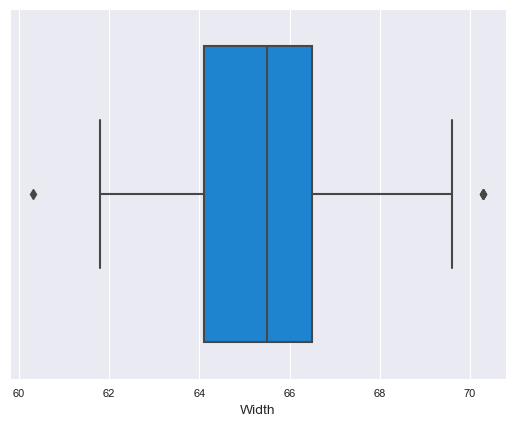

In [106]:
# Check Outliers

sns.boxplot(x=df.Width)
plt.show()

***Curb-Weight (Right skew)***

In [107]:
#Basic info about column
df["Curb-Weight"].describe()

count     201.000000
mean     2555.666667
std       517.296727
min      1488.000000
25%      2169.000000
50%      2414.000000
75%      2926.000000
max      4066.000000
Name: Curb-Weight, dtype: float64

In [108]:
# To find Q1 and Q3.
# To calculate quantiles using quantile().

Q1=df['Curb-Weight'].quantile(0.25) # 25%
print("lower_quantile",Q1)

Q3=df['Curb-Weight'].quantile(0.75) # 75%
print("upper_quantile",Q3)


lower_quantile 2169.0
upper_quantile 2926.0


In [109]:
# To Find IQR.

IQR=Q3-Q1
IQR

757.0

In [110]:
# To find lower limit and upper limit

lower_limit=Q1-1.5*IQR
print("lower_limit",lower_limit)

upper_limit=Q3+1.5*IQR
print("upper_limit",upper_limit)

lower_limit 1033.5
upper_limit 4061.5


In [111]:
# To find value above upper_limit.

df.loc[df['Curb-Weight']>upper_limit] 

,Symboling,Normalized-Losses,Make,Fuel-Type,Aspiration,Num-Of-Doors,Body-Style,Drive-Wheels,Engine-Location,Wheel-Base,Length,Width,Height,Curb-Weight,Engine-Type,Num-Of-Cylinders,Engine-Size,Fuel-System,Bore,Stroke,Compression-Ratio,Horsepower,Peak-rpm,City-mpg,Highway-mpg,Price
44,0,145.0,jaguar,gas,std,four,sedan,rwd,front,113.0,199.6,69.6,52.8,4066,dohc,six,258,mpfi,3.63,4.17,8.1,176.0,4750.0,15,19,32250
45,0,115.0,jaguar,gas,std,four,sedan,rwd,front,113.0,199.6,69.6,52.8,4066,dohc,six,258,mpfi,3.63,4.17,8.1,176.0,4750.0,15,19,35550


In [112]:
# To find percentage of outliers.

len(df.loc[df['Curb-Weight']>upper_limit] )/len(df)

0.009950248756218905

In [113]:
# To find value below lower_limit.

df.loc[df['Curb-Weight']<lower_limit] # There are no data in lower limit.

,Symboling,Normalized-Losses,Make,Fuel-Type,Aspiration,Num-Of-Doors,Body-Style,Drive-Wheels,Engine-Location,Wheel-Base,Length,Width,Height,Curb-Weight,Engine-Type,Num-Of-Cylinders,Engine-Size,Fuel-System,Bore,Stroke,Compression-Ratio,Horsepower,Peak-rpm,City-mpg,Highway-mpg,Price


In [114]:
#To replace outliers with median value
df.loc[df['Curb-Weight']>upper_limit,"Curb-Weight"]=df['Curb-Weight'].median()


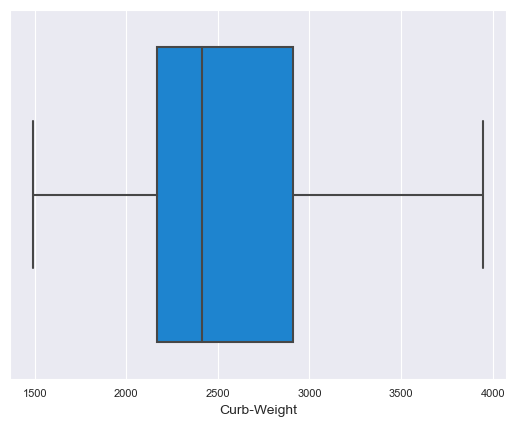

In [115]:
# Check Outliers

sns.boxplot(x=df['Curb-Weight'])
plt.show()

***Engine-Size (Right skew)***

In [116]:
#Basic info about column
df["Engine-Size"].describe()

count    201.000000
mean     126.875622
std       41.546834
min       61.000000
25%       98.000000
50%      120.000000
75%      141.000000
max      326.000000
Name: Engine-Size, dtype: float64

In [117]:
# To find Q1 and Q3.
# To calculate quantiles using quantile().

Q1=df['Engine-Size'].quantile(0.25) # 25%
print("lower_quantile",Q1)

Q3=df['Engine-Size'].quantile(0.75) # 75%
print("upper_quantile",Q3)


lower_quantile 98.0
upper_quantile 141.0


In [118]:
# To Find IQR.

IQR=Q3-Q1
IQR

43.0

In [119]:
# To find lower limit and upper limit

lower_limit=Q1-1.5*IQR
print("lower_limit",lower_limit)

upper_limit=Q3+1.5*IQR
print("upper_limit",upper_limit)

lower_limit 33.5
upper_limit 205.5


In [120]:
# To find value above upper_limit.

df.loc[df['Engine-Size']>upper_limit] 

,Symboling,Normalized-Losses,Make,Fuel-Type,Aspiration,Num-Of-Doors,Body-Style,Drive-Wheels,Engine-Location,Wheel-Base,Length,Width,Height,Curb-Weight,Engine-Type,Num-Of-Cylinders,Engine-Size,Fuel-System,Bore,Stroke,Compression-Ratio,Horsepower,Peak-rpm,City-mpg,Highway-mpg,Price
14,0,115.0,bmw,gas,std,four,sedan,rwd,front,103.5,189.0,66.9,55.7,3230,ohc,six,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,30760
15,0,115.0,bmw,gas,std,two,sedan,rwd,front,103.5,193.8,67.9,53.7,3380,ohc,six,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,41315
16,0,115.0,bmw,gas,std,four,sedan,rwd,front,110.0,197.0,65.5,56.3,3505,ohc,six,209,mpfi,3.62,3.39,8.0,182.0,5400.0,15,20,36880
44,0,145.0,jaguar,gas,std,four,sedan,rwd,front,113.0,199.6,69.6,52.8,2414,dohc,six,258,mpfi,3.63,4.17,8.1,176.0,4750.0,15,19,32250
45,0,115.0,jaguar,gas,std,four,sedan,rwd,front,113.0,199.6,69.6,52.8,2414,dohc,six,258,mpfi,3.63,4.17,8.1,176.0,4750.0,15,19,35550
46,0,115.0,jaguar,gas,std,two,sedan,rwd,front,102.0,191.7,65.5,47.8,3950,ohcv,twelve,326,mpfi,3.54,2.76,11.5,262.0,5000.0,13,17,36000
68,-1,115.0,mercedes-benz,gas,std,four,sedan,rwd,front,97.0,202.6,65.5,56.5,3740,ohcv,eight,234,mpfi,3.46,3.10,8.3,155.0,4750.0,16,18,34184
69,3,142.0,mercedes-benz,gas,std,two,convertible,rwd,front,96.6,180.3,65.5,50.8,3685,ohcv,eight,234,mpfi,3.46,3.10,8.3,155.0,4750.0,16,18,35056
70,0,115.0,mercedes-benz,gas,std,four,sedan,rwd,front,97.0,208.1,65.5,56.7,3900,ohcv,eight,308,mpfi,3.80,3.35,8.0,184.0,4500.0,14,16,40960
71,1,115.0,mercedes-benz,gas,std,two,hardtop,rwd,front,112.0,199.2,65.5,55.4,3715,ohcv,eight,304,mpfi,3.80,3.35,8.0,184.0,4500.0,14,16,45400


In [121]:
# To find percentage of outliers.

len(df.loc[df['Engine-Size']>upper_limit] )/len(df)

0.04975124378109453

In [122]:
# To find value below lower_limit.

df.loc[df['Engine-Size']<lower_limit] # There are no data in lower limit.

,Symboling,Normalized-Losses,Make,Fuel-Type,Aspiration,Num-Of-Doors,Body-Style,Drive-Wheels,Engine-Location,Wheel-Base,Length,Width,Height,Curb-Weight,Engine-Type,Num-Of-Cylinders,Engine-Size,Fuel-System,Bore,Stroke,Compression-Ratio,Horsepower,Peak-rpm,City-mpg,Highway-mpg,Price


In [123]:
#To replace outliers with median value
df.loc[df['Engine-Size']>upper_limit,"Engine-Size"]=df['Engine-Size'].median()


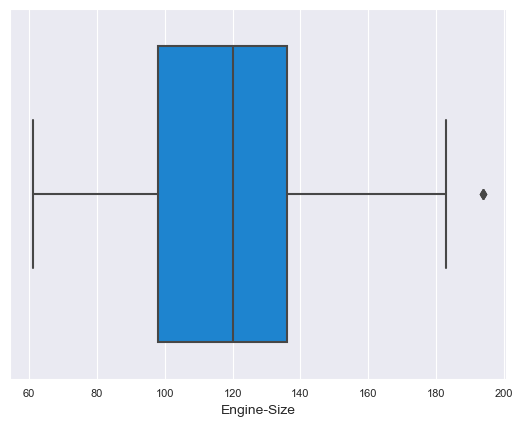

In [124]:
# Check Outliers

sns.boxplot(x=df['Engine-Size'])
plt.show()

***Stroke (left skew)***

In [125]:
#Basic info about column
df["Stroke"].describe()

count    201.000000
mean       3.257562
std        0.316082
min        2.070000
25%        3.110000
50%        3.290000
75%        3.410000
max        4.170000
Name: Stroke, dtype: float64

In [126]:
# To find Q1 and Q3.
# To calculate quantiles using quantile().

Q1=df['Stroke'].quantile(0.25) # 25%
print("lower_quantile",Q1)

Q3=df['Stroke'].quantile(0.75) # 75%
print("upper_quantile",Q3)


lower_quantile 3.11
upper_quantile 3.41


In [127]:
# To Find IQR.

IQR=Q3-Q1
IQR

0.30000000000000027

In [128]:
# To find lower limit and upper limit

lower_limit=Q1-1.5*IQR
print("lower_limit",lower_limit)

upper_limit=Q3+1.5*IQR
print("upper_limit",upper_limit)

lower_limit 2.6599999999999993
upper_limit 3.8600000000000003


In [129]:
# To find value above upper_limit.

df.loc[df['Stroke']>upper_limit] 

,Symboling,Normalized-Losses,Make,Fuel-Type,Aspiration,Num-Of-Doors,Body-Style,Drive-Wheels,Engine-Location,Wheel-Base,Length,Width,Height,Curb-Weight,Engine-Type,Num-Of-Cylinders,Engine-Size,Fuel-System,Bore,Stroke,Compression-Ratio,Horsepower,Peak-rpm,City-mpg,Highway-mpg,Price
28,3,145.0,dodge,gas,turbo,two,hatchback,fwd,front,95.9,173.2,66.3,50.2,2811,ohc,four,156,mfi,3.60,3.90,7.0,145.0,5000.0,19,24,12964
44,0,145.0,jaguar,gas,std,four,sedan,rwd,front,113.0,199.6,69.6,52.8,2414,dohc,six,120,mpfi,3.63,4.17,8.1,176.0,4750.0,15,19,32250
45,0,115.0,jaguar,gas,std,four,sedan,rwd,front,113.0,199.6,69.6,52.8,2414,dohc,six,120,mpfi,3.63,4.17,8.1,176.0,4750.0,15,19,35550
126,0,115.0,renault,gas,std,four,wagon,fwd,front,96.1,181.5,66.5,55.2,2579,ohc,four,132,mpfi,3.46,3.90,8.7,95.0,5200.0,23,31,9295
127,2,115.0,renault,gas,std,two,hatchback,fwd,front,96.1,176.8,66.6,50.5,2460,ohc,four,132,mpfi,3.46,3.90,8.7,95.0,5200.0,23,31,9895


In [130]:
# To find percentage of outliers.

len(df.loc[df['Stroke']>upper_limit] )/len(df)

0.024875621890547265

In [131]:
# To find value below lower_limit.

df.loc[df['Stroke']<lower_limit] # There are no data in lower limit.

,Symboling,Normalized-Losses,Make,Fuel-Type,Aspiration,Num-Of-Doors,Body-Style,Drive-Wheels,Engine-Location,Wheel-Base,Length,Width,Height,Curb-Weight,Engine-Type,Num-Of-Cylinders,Engine-Size,Fuel-System,Bore,Stroke,Compression-Ratio,Horsepower,Peak-rpm,City-mpg,Highway-mpg,Price
108,0,161.0,peugot,gas,std,four,sedan,rwd,front,107.9,186.7,68.4,56.7,3075,l,four,120,mpfi,3.46,2.19,8.4,95.0,5000.0,19,24,15580
110,0,115.0,peugot,gas,std,four,wagon,rwd,front,114.2,198.9,68.4,56.7,3285,l,four,120,mpfi,3.46,2.19,8.4,95.0,5000.0,19,24,16695
130,3,150.0,saab,gas,std,two,hatchback,fwd,front,99.1,186.6,66.5,56.1,2707,ohc,four,121,mpfi,2.54,2.07,9.3,110.0,5250.0,21,28,15040
134,2,83.0,subaru,gas,std,two,hatchback,fwd,front,93.7,156.9,63.4,53.7,2050,ohcf,four,97,2bbl,3.62,2.36,9.0,69.0,4900.0,31,36,5118
135,2,83.0,subaru,gas,std,two,hatchback,fwd,front,93.7,157.9,63.6,53.7,2120,ohcf,four,108,2bbl,3.62,2.64,8.7,73.0,4400.0,26,31,7053
136,2,83.0,subaru,gas,std,two,hatchback,4wd,front,93.3,157.3,63.8,55.7,2240,ohcf,four,108,2bbl,3.62,2.64,8.7,73.0,4400.0,26,31,7603
137,0,102.0,subaru,gas,std,four,sedan,fwd,front,97.2,172.0,65.4,52.5,2145,ohcf,four,108,2bbl,3.62,2.64,9.5,82.0,4800.0,32,37,7126
138,0,102.0,subaru,gas,std,four,sedan,fwd,front,97.2,172.0,65.4,52.5,2190,ohcf,four,108,2bbl,3.62,2.64,9.5,82.0,4400.0,28,33,7775
139,0,102.0,subaru,gas,std,four,sedan,fwd,front,97.2,172.0,65.4,52.5,2340,ohcf,four,108,mpfi,3.62,2.64,9.0,94.0,5200.0,26,32,9960
140,0,102.0,subaru,gas,std,four,sedan,4wd,front,97.0,172.0,65.4,54.3,2385,ohcf,four,108,2bbl,3.62,2.64,9.0,82.0,4800.0,24,25,9233


In [132]:
# To find percentage of outliers.

len(df.loc[df['Stroke']<lower_limit] )/len(df)

0.07462686567164178

In [133]:
#To replace outliers with median value
df.loc[df['Stroke']>upper_limit,"Stroke"]=df['Stroke'].median()
df.loc[df['Stroke']<lower_limit,"Stroke"]=df['Stroke'].median()

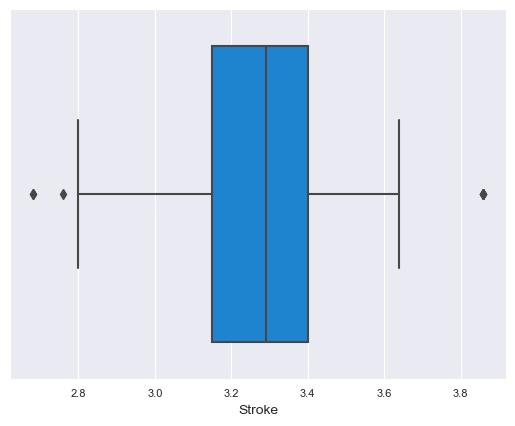

In [134]:
# Check Outliers

sns.boxplot(x=df['Stroke'])
plt.show()

***Compression-Ratio (Right skew)***

In [135]:
#Basic info about column
df["Compression-Ratio"].describe()

count    201.000000
mean      10.164279
std        4.004965
min        7.000000
25%        8.600000
50%        9.000000
75%        9.400000
max       23.000000
Name: Compression-Ratio, dtype: float64

In [136]:
# To find Q1 and Q3.
# To calculate quantiles using quantile().

Q1=df['Compression-Ratio'].quantile(0.25) # 25%
print("lower_quantile",Q1)

Q3=df['Compression-Ratio'].quantile(0.75) # 75%
print("upper_quantile",Q3)


lower_quantile 8.6
upper_quantile 9.4


In [137]:
# To Find IQR.

IQR=Q3-Q1
IQR

0.8000000000000007

In [138]:
# To find lower limit and upper limit

lower_limit=Q1-1.5*IQR
print("lower_limit",lower_limit)

upper_limit=Q3+1.5*IQR
print("upper_limit",upper_limit)

lower_limit 7.399999999999999
upper_limit 10.600000000000001


In [139]:
# To find value above upper_limit.

df.loc[df['Compression-Ratio']>upper_limit] 

,Symboling,Normalized-Losses,Make,Fuel-Type,Aspiration,Num-Of-Doors,Body-Style,Drive-Wheels,Engine-Location,Wheel-Base,Length,Width,Height,Curb-Weight,Engine-Type,Num-Of-Cylinders,Engine-Size,Fuel-System,Bore,Stroke,Compression-Ratio,Horsepower,Peak-rpm,City-mpg,Highway-mpg,Price
46,0,115.0,jaguar,gas,std,two,sedan,rwd,front,102.0,191.7,65.5,47.8,3950,ohcv,twelve,120,mpfi,3.54,2.76,11.5,262.0,5000.0,13,17,36000
60,0,115.0,mazda,diesel,std,four,sedan,fwd,front,98.8,177.8,66.5,55.5,2443,ohc,four,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795
63,0,115.0,mazda,diesel,std,four,sedan,rwd,front,104.9,175.0,66.1,54.4,2700,ohc,four,134,idi,3.43,3.64,22.0,72.0,4200.0,31,39,18344
64,-1,93.0,mercedes-benz,diesel,turbo,four,sedan,rwd,front,110.0,190.9,70.3,56.5,3515,ohc,five,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,25552
65,-1,93.0,mercedes-benz,diesel,turbo,four,wagon,rwd,front,110.0,190.9,70.3,58.7,3750,ohc,five,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,28248
66,0,93.0,mercedes-benz,diesel,turbo,two,hardtop,rwd,front,106.7,187.5,70.3,54.9,3495,ohc,five,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,28176
67,-1,93.0,mercedes-benz,diesel,turbo,four,sedan,rwd,front,97.0,202.6,65.5,56.3,3770,ohc,five,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,31600
87,1,128.0,nissan,diesel,std,two,sedan,fwd,front,94.5,165.3,63.8,54.5,2017,ohc,four,103,idi,2.99,3.47,21.9,55.0,4800.0,45,50,7099
105,0,161.0,peugot,diesel,turbo,four,sedan,rwd,front,107.9,186.7,68.4,56.7,3197,l,four,152,idi,3.70,3.52,21.0,95.0,4150.0,28,33,13200
107,0,115.0,peugot,diesel,turbo,four,wagon,rwd,front,114.2,198.9,68.4,58.7,3430,l,four,152,idi,3.70,3.52,21.0,95.0,4150.0,25,25,13860


In [140]:
# To find percentage of outliers.

len(df.loc[df['Compression-Ratio']>upper_limit] )/len(df)

0.1044776119402985

In [141]:
# To find value below lower_limit.

df.loc[df['Compression-Ratio']<lower_limit] # There are no data in lower limit.

,Symboling,Normalized-Losses,Make,Fuel-Type,Aspiration,Num-Of-Doors,Body-Style,Drive-Wheels,Engine-Location,Wheel-Base,Length,Width,Height,Curb-Weight,Engine-Type,Num-Of-Cylinders,Engine-Size,Fuel-System,Bore,Stroke,Compression-Ratio,Horsepower,Peak-rpm,City-mpg,Highway-mpg,Price
28,3,145.0,dodge,gas,turbo,two,hatchback,fwd,front,95.9,173.2,66.3,50.2,2811,ohc,four,156,mfi,3.60,3.29,7.0,145.0,5000.0,19,24,12964
79,3,115.0,mitsubishi,gas,turbo,two,hatchback,fwd,front,95.9,173.2,66.3,50.2,2833,ohc,four,156,spdi,3.58,3.86,7.0,145.0,5000.0,19,24,12629
80,3,115.0,mitsubishi,gas,turbo,two,hatchback,fwd,front,95.9,173.2,66.3,50.2,2921,ohc,four,156,spdi,3.59,3.86,7.0,145.0,5000.0,19,24,14869
81,3,115.0,mitsubishi,gas,turbo,two,hatchback,fwd,front,95.9,173.2,66.3,50.2,2926,ohc,four,156,spdi,3.59,3.86,7.0,145.0,5000.0,19,24,14489
114,0,161.0,peugot,gas,turbo,four,sedan,rwd,front,108.0,186.7,68.3,56.0,3130,l,four,134,mpfi,3.61,3.21,7.0,142.0,5600.0,18,24,18150
121,3,115.0,plymouth,gas,turbo,two,hatchback,rwd,front,95.9,173.2,66.3,50.2,2818,ohc,four,156,spdi,3.59,3.86,7.0,145.0,5000.0,19,24,12764


In [142]:
# To find percentage of outliers.

len(df.loc[df['Compression-Ratio']<lower_limit] )/len(df)

0.029850746268656716

In [143]:
#To replace outliers with median value
df.loc[df['Compression-Ratio']>upper_limit,"Compression-Ratio"]=df['Compression-Ratio'].median()
df.loc[df['Compression-Ratio']<lower_limit,"Compression-Ratio"]=df['Compression-Ratio'].median()

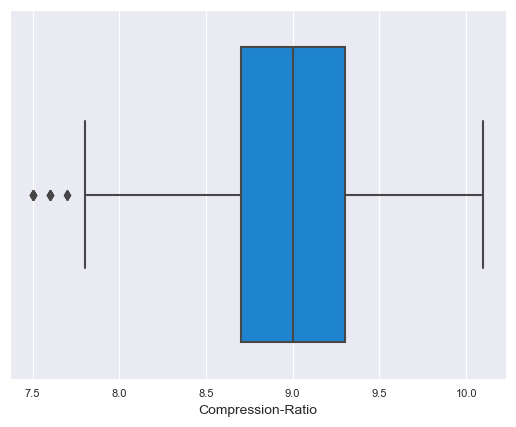

In [144]:
# Check Outliers

sns.boxplot(x=df['Compression-Ratio'])
plt.show()

***Horsepower  (Right skew)***

In [145]:
#Basic info about column
df["Horsepower"].describe()

count    201.000000
mean     103.313433
std       37.374942
min       48.000000
25%       70.000000
50%       95.000000
75%      116.000000
max      262.000000
Name: Horsepower, dtype: float64

In [146]:
# To find Q1 and Q3.
# To calculate quantiles using quantile().

Q1=df['Horsepower'].quantile(0.25) # 25%
print("lower_quantile",Q1)

Q3=df['Horsepower'].quantile(0.75) # 75%
print("upper_quantile",Q3)


lower_quantile 70.0
upper_quantile 116.0


In [147]:
# To Find IQR.

IQR=Q3-Q1
IQR

46.0

In [148]:
# To find lower limit and upper limit

lower_limit=Q1-1.5*IQR
print("lower_limit",lower_limit)

upper_limit=Q3+1.5*IQR
print("upper_limit",upper_limit)

lower_limit 1.0
upper_limit 185.0


In [149]:
# To find value above upper_limit.

df.loc[df['Horsepower']>upper_limit] 

,Symboling,Normalized-Losses,Make,Fuel-Type,Aspiration,Num-Of-Doors,Body-Style,Drive-Wheels,Engine-Location,Wheel-Base,Length,Width,Height,Curb-Weight,Engine-Type,Num-Of-Cylinders,Engine-Size,Fuel-System,Bore,Stroke,Compression-Ratio,Horsepower,Peak-rpm,City-mpg,Highway-mpg,Price
46,0,115.0,jaguar,gas,std,two,sedan,rwd,front,102.0,191.7,65.5,47.8,3950,ohcv,twelve,120,mpfi,3.54,2.76,9.0,262.0,5000.0,13,17,36000
102,3,115.0,nissan,gas,turbo,two,hatchback,rwd,front,91.3,170.7,67.9,49.7,3139,ohcv,six,181,mpfi,3.43,3.27,7.8,200.0,5200.0,17,23,19699
123,3,115.0,porsche,gas,std,two,hardtop,rwd,rear,89.5,168.9,65.0,51.6,2756,ohcf,six,194,mpfi,3.74,2.90,9.5,207.0,5900.0,17,25,32528
124,3,115.0,porsche,gas,std,two,hardtop,rwd,rear,89.5,168.9,65.0,51.6,2756,ohcf,six,194,mpfi,3.74,2.90,9.5,207.0,5900.0,17,25,34028
125,3,115.0,porsche,gas,std,two,convertible,rwd,rear,89.5,168.9,65.0,51.6,2800,ohcf,six,194,mpfi,3.74,2.90,9.5,207.0,5900.0,17,25,37028


In [150]:
# To find percentage of outliers.

len(df.loc[df['Horsepower']>upper_limit] )/len(df)

0.024875621890547265

In [151]:
# To find value below lower_limit.

df.loc[df['Horsepower']<lower_limit] # There are no data in lower limit.

,Symboling,Normalized-Losses,Make,Fuel-Type,Aspiration,Num-Of-Doors,Body-Style,Drive-Wheels,Engine-Location,Wheel-Base,Length,Width,Height,Curb-Weight,Engine-Type,Num-Of-Cylinders,Engine-Size,Fuel-System,Bore,Stroke,Compression-Ratio,Horsepower,Peak-rpm,City-mpg,Highway-mpg,Price


In [152]:
#To replace outliers with median value
df.loc[df['Horsepower']>upper_limit,"Horsepower"]=df['Horsepower'].median()

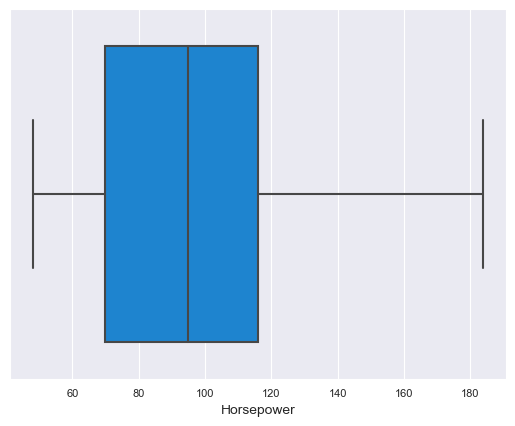

In [153]:
# Check Outliers

sns.boxplot(x=df['Horsepower'])
plt.show()

***Peak-rpm (Normal)***

In [154]:
#Basic info about column
df["Peak-rpm"].describe()

count     201.000000
mean     5118.407960
std       478.183493
min      4150.000000
25%      4800.000000
50%      5200.000000
75%      5500.000000
max      6600.000000
Name: Peak-rpm, dtype: float64

In [155]:
lower_limit=df['Peak-rpm'].mean()-3*df['Peak-rpm'].std()
upper_limit=df['Peak-rpm'].mean()+3*df['Peak-rpm'].std()
print("lower_limit",lower_limit)
print("upper_limit",upper_limit)

lower_limit 3683.8574819561286
upper_limit 6552.958438441881


In [156]:
# Find value less than lower limit

df.loc[df['Peak-rpm']>upper_limit]

,Symboling,Normalized-Losses,Make,Fuel-Type,Aspiration,Num-Of-Doors,Body-Style,Drive-Wheels,Engine-Location,Wheel-Base,Length,Width,Height,Curb-Weight,Engine-Type,Num-Of-Cylinders,Engine-Size,Fuel-System,Bore,Stroke,Compression-Ratio,Horsepower,Peak-rpm,City-mpg,Highway-mpg,Price
161,1,168.0,toyota,gas,std,two,sedan,rwd,front,94.5,168.7,64.0,52.6,2265,dohc,four,98,mpfi,3.24,3.08,9.4,112.0,6600.0,26,29,9298
162,1,168.0,toyota,gas,std,two,hatchback,rwd,front,94.5,168.7,64.0,52.6,2300,dohc,four,98,mpfi,3.24,3.08,9.4,112.0,6600.0,26,29,9538


In [157]:
# To find percentage of outliers.

len(df.loc[df['Peak-rpm']>upper_limit] )/len(df)

0.009950248756218905

In [158]:
# To find value below lower_limit.

df.loc[df['Peak-rpm']<lower_limit]

,Symboling,Normalized-Losses,Make,Fuel-Type,Aspiration,Num-Of-Doors,Body-Style,Drive-Wheels,Engine-Location,Wheel-Base,Length,Width,Height,Curb-Weight,Engine-Type,Num-Of-Cylinders,Engine-Size,Fuel-System,Bore,Stroke,Compression-Ratio,Horsepower,Peak-rpm,City-mpg,Highway-mpg,Price


In [159]:
df.loc[df['Peak-rpm']>upper_limit,"Peak-rpm"]=df['Peak-rpm'].mean()

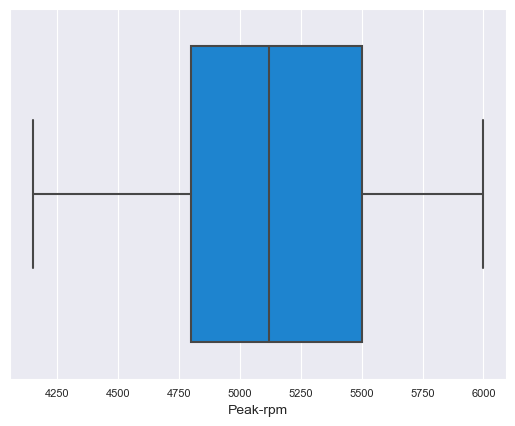

In [160]:
# Check Outliers

sns.boxplot(x=df['Peak-rpm'])
plt.show()

***City-mpg (Right skew)***

In [161]:
#Basic info about column
df["City-mpg"].describe()

count    201.000000
mean      25.179104
std        6.423220
min       13.000000
25%       19.000000
50%       24.000000
75%       30.000000
max       49.000000
Name: City-mpg, dtype: float64

In [162]:
# To find Q1 and Q3.
# To calculate quantiles using quantile().

Q1=df['City-mpg'].quantile(0.25) # 25%
print("lower_quantile",Q1)

Q3=df['City-mpg'].quantile(0.75) # 75%
print("upper_quantile",Q3)


lower_quantile 19.0
upper_quantile 30.0


In [163]:
# To Find IQR.

IQR=Q3-Q1
IQR

11.0

In [164]:
# To find lower limit and upper limit

lower_limit=Q1-1.5*IQR
print("lower_limit",lower_limit)

upper_limit=Q3+1.5*IQR
print("upper_limit",upper_limit)

lower_limit 2.5
upper_limit 46.5


In [165]:
# To find value above upper_limit.

df.loc[df['City-mpg']>upper_limit] 

,Symboling,Normalized-Losses,Make,Fuel-Type,Aspiration,Num-Of-Doors,Body-Style,Drive-Wheels,Engine-Location,Wheel-Base,Length,Width,Height,Curb-Weight,Engine-Type,Num-Of-Cylinders,Engine-Size,Fuel-System,Bore,Stroke,Compression-Ratio,Horsepower,Peak-rpm,City-mpg,Highway-mpg,Price
17,2,121.0,chevrolet,gas,std,two,hatchback,fwd,front,88.4,141.1,60.3,53.2,1488,l,three,61,2bbl,2.91,3.03,9.5,48.0,5100.0,47,53,5151
29,2,137.0,honda,gas,std,two,hatchback,fwd,front,86.6,144.6,63.9,50.8,1713,ohc,four,92,1bbl,2.91,3.41,9.6,58.0,4800.0,49,54,6479


In [166]:
# To find percentage of outliers.

len(df.loc[df['City-mpg']>upper_limit] )/len(df)

0.009950248756218905

In [167]:
# To find value below lower_limit.

df.loc[df['City-mpg']<lower_limit] # There are no data in lower limit.

,Symboling,Normalized-Losses,Make,Fuel-Type,Aspiration,Num-Of-Doors,Body-Style,Drive-Wheels,Engine-Location,Wheel-Base,Length,Width,Height,Curb-Weight,Engine-Type,Num-Of-Cylinders,Engine-Size,Fuel-System,Bore,Stroke,Compression-Ratio,Horsepower,Peak-rpm,City-mpg,Highway-mpg,Price


In [168]:
#To replace outliers with median value
df.loc[df['City-mpg']>upper_limit,"City-mpg"]=df['City-mpg'].median()

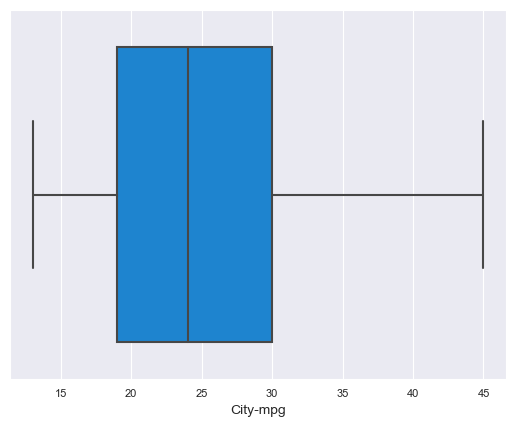

In [169]:
# Check Outliers

sns.boxplot(x=df['City-mpg'])
plt.show()

***Highway-mpg (Normal)***

In [170]:
#Basic info about column
df["Highway-mpg"].describe()

count    201.000000
mean      30.686567
std        6.815150
min       16.000000
25%       25.000000
50%       30.000000
75%       34.000000
max       54.000000
Name: Highway-mpg, dtype: float64

In [171]:
lower_limit=df['Highway-mpg'].mean()-3*df['Highway-mpg'].std()
upper_limit=df['Highway-mpg'].mean()+3*df['Highway-mpg'].std()
print("lower_limit",lower_limit)
print("upper_limit",upper_limit)

lower_limit 10.241117354736229
upper_limit 51.13201697362199


In [172]:
# Find value less than lower limit

df.loc[df['Highway-mpg']>upper_limit]

,Symboling,Normalized-Losses,Make,Fuel-Type,Aspiration,Num-Of-Doors,Body-Style,Drive-Wheels,Engine-Location,Wheel-Base,Length,Width,Height,Curb-Weight,Engine-Type,Num-Of-Cylinders,Engine-Size,Fuel-System,Bore,Stroke,Compression-Ratio,Horsepower,Peak-rpm,City-mpg,Highway-mpg,Price
17,2,121.0,chevrolet,gas,std,two,hatchback,fwd,front,88.4,141.1,60.3,53.2,1488,l,three,61,2bbl,2.91,3.03,9.5,48.0,5100.0,24,53,5151
29,2,137.0,honda,gas,std,two,hatchback,fwd,front,86.6,144.6,63.9,50.8,1713,ohc,four,92,1bbl,2.91,3.41,9.6,58.0,4800.0,24,54,6479


In [173]:
# To find percentage of outliers.

len(df.loc[df['Highway-mpg']>upper_limit] )/len(df)

0.009950248756218905

In [174]:
# To find value below lower_limit.

df.loc[df['Highway-mpg']<lower_limit]

,Symboling,Normalized-Losses,Make,Fuel-Type,Aspiration,Num-Of-Doors,Body-Style,Drive-Wheels,Engine-Location,Wheel-Base,Length,Width,Height,Curb-Weight,Engine-Type,Num-Of-Cylinders,Engine-Size,Fuel-System,Bore,Stroke,Compression-Ratio,Horsepower,Peak-rpm,City-mpg,Highway-mpg,Price


In [175]:
df.loc[df['Highway-mpg']>upper_limit,"Highway-mpg"]=df['Highway-mpg'].mean()


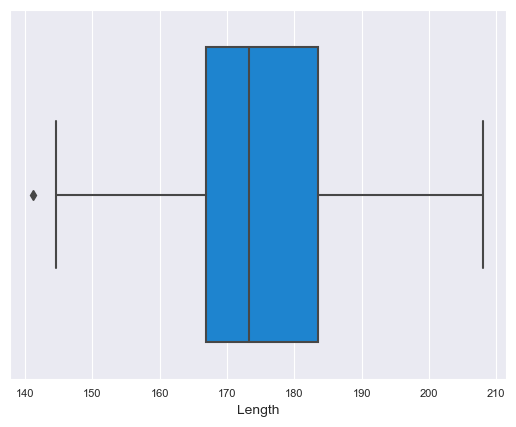

In [176]:
# Check Outliers

sns.boxplot(x=df['Length'])
plt.show()

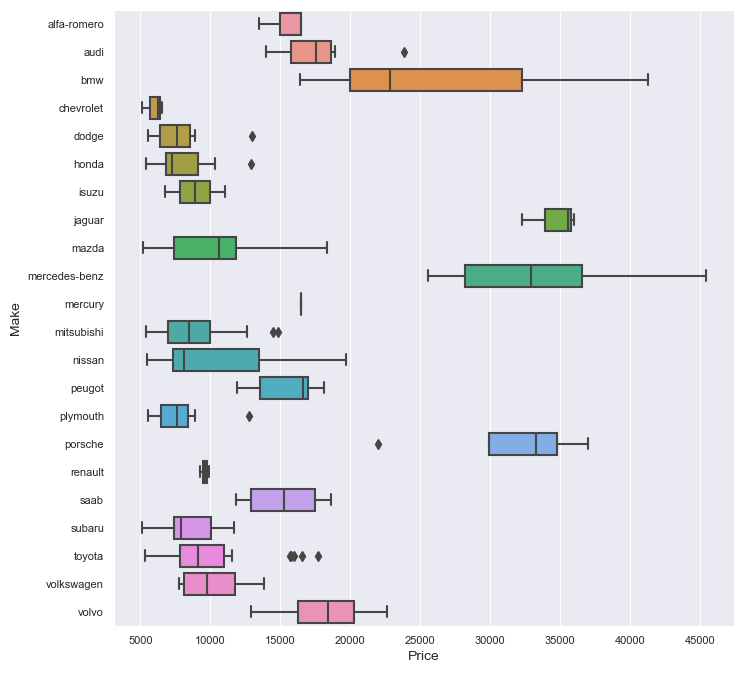

In [177]:
#Exp:- Outlier according to 'Price' and 'Make'

plt.figure(figsize=(8,8))
sns.boxplot(data=df,x='Price',y="Make")
plt.show()

In [178]:
# audi

df[(df['Make'] == 'audi') & (df['Price'] > 20000)]

,Symboling,Normalized-Losses,Make,Fuel-Type,Aspiration,Num-Of-Doors,Body-Style,Drive-Wheels,Engine-Location,Wheel-Base,Length,Width,Height,Curb-Weight,Engine-Type,Num-Of-Cylinders,Engine-Size,Fuel-System,Bore,Stroke,Compression-Ratio,Horsepower,Peak-rpm,City-mpg,Highway-mpg,Price
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,65.5,55.9,3086,ohc,five,131,mpfi,3.13,3.4,8.3,140.0,5500.0,17,20.0,23875


In [179]:
df.drop(8,inplace=True)

In [180]:
df[(df['Make'] == 'audi') & (df['Price'] > 20000)]

,Symboling,Normalized-Losses,Make,Fuel-Type,Aspiration,Num-Of-Doors,Body-Style,Drive-Wheels,Engine-Location,Wheel-Base,Length,Width,Height,Curb-Weight,Engine-Type,Num-Of-Cylinders,Engine-Size,Fuel-System,Bore,Stroke,Compression-Ratio,Horsepower,Peak-rpm,City-mpg,Highway-mpg,Price


***********

In [181]:
# dodge

df[(df['Make'] == 'dodge') & (df['Price'] > 10000)]

,Symboling,Normalized-Losses,Make,Fuel-Type,Aspiration,Num-Of-Doors,Body-Style,Drive-Wheels,Engine-Location,Wheel-Base,Length,Width,Height,Curb-Weight,Engine-Type,Num-Of-Cylinders,Engine-Size,Fuel-System,Bore,Stroke,Compression-Ratio,Horsepower,Peak-rpm,City-mpg,Highway-mpg,Price
28,3,145.0,dodge,gas,turbo,two,hatchback,fwd,front,95.9,173.2,66.3,50.2,2811,ohc,four,156,mfi,3.6,3.29,9.0,145.0,5000.0,19,24.0,12964


In [182]:
df.drop(28,inplace=True)

In [183]:
df[(df['Make'] == 'dodge') & (df['Price'] > 10000)]

,Symboling,Normalized-Losses,Make,Fuel-Type,Aspiration,Num-Of-Doors,Body-Style,Drive-Wheels,Engine-Location,Wheel-Base,Length,Width,Height,Curb-Weight,Engine-Type,Num-Of-Cylinders,Engine-Size,Fuel-System,Bore,Stroke,Compression-Ratio,Horsepower,Peak-rpm,City-mpg,Highway-mpg,Price


*********************

In [184]:
#honda 

df[(df['Make'] == 'honda') & (df['Price'] > 12000)]

,Symboling,Normalized-Losses,Make,Fuel-Type,Aspiration,Num-Of-Doors,Body-Style,Drive-Wheels,Engine-Location,Wheel-Base,Length,Width,Height,Curb-Weight,Engine-Type,Num-Of-Cylinders,Engine-Size,Fuel-System,Bore,Stroke,Compression-Ratio,Horsepower,Peak-rpm,City-mpg,Highway-mpg,Price
40,0,85.0,honda,gas,std,four,sedan,fwd,front,96.5,175.4,65.2,54.1,2465,ohc,four,110,mpfi,3.15,3.58,9.0,101.0,5800.0,24,28.0,12945


In [185]:
df.drop(40,inplace=True)

In [186]:

df[(df['Make'] == 'honda') & (df['Price'] > 12000)]

,Symboling,Normalized-Losses,Make,Fuel-Type,Aspiration,Num-Of-Doors,Body-Style,Drive-Wheels,Engine-Location,Wheel-Base,Length,Width,Height,Curb-Weight,Engine-Type,Num-Of-Cylinders,Engine-Size,Fuel-System,Bore,Stroke,Compression-Ratio,Horsepower,Peak-rpm,City-mpg,Highway-mpg,Price


*****************

In [187]:
# mitsubishi

df[(df['Make'] == 'mitsubishi') & (df['Price'] > 14000)]

,Symboling,Normalized-Losses,Make,Fuel-Type,Aspiration,Num-Of-Doors,Body-Style,Drive-Wheels,Engine-Location,Wheel-Base,Length,Width,Height,Curb-Weight,Engine-Type,Num-Of-Cylinders,Engine-Size,Fuel-System,Bore,Stroke,Compression-Ratio,Horsepower,Peak-rpm,City-mpg,Highway-mpg,Price
80,3,115.0,mitsubishi,gas,turbo,two,hatchback,fwd,front,95.9,173.2,66.3,50.2,2921,ohc,four,156,spdi,3.59,3.86,9.0,145.0,5000.0,19,24.0,14869
81,3,115.0,mitsubishi,gas,turbo,two,hatchback,fwd,front,95.9,173.2,66.3,50.2,2926,ohc,four,156,spdi,3.59,3.86,9.0,145.0,5000.0,19,24.0,14489


In [188]:
df.drop([80,81],inplace=True)

In [189]:
df[(df['Make'] == 'mitsubishi') & (df['Price'] > 12000)]

,Symboling,Normalized-Losses,Make,Fuel-Type,Aspiration,Num-Of-Doors,Body-Style,Drive-Wheels,Engine-Location,Wheel-Base,Length,Width,Height,Curb-Weight,Engine-Type,Num-Of-Cylinders,Engine-Size,Fuel-System,Bore,Stroke,Compression-Ratio,Horsepower,Peak-rpm,City-mpg,Highway-mpg,Price
79,3,115.0,mitsubishi,gas,turbo,two,hatchback,fwd,front,95.9,173.2,66.3,50.2,2833,ohc,four,156,spdi,3.58,3.86,9.0,145.0,5000.0,19,24.0,12629


************************

In [190]:
# plymouth

df[(df['Make'] == 'plymouth') & (df['Price'] > 10000)]

,Symboling,Normalized-Losses,Make,Fuel-Type,Aspiration,Num-Of-Doors,Body-Style,Drive-Wheels,Engine-Location,Wheel-Base,Length,Width,Height,Curb-Weight,Engine-Type,Num-Of-Cylinders,Engine-Size,Fuel-System,Bore,Stroke,Compression-Ratio,Horsepower,Peak-rpm,City-mpg,Highway-mpg,Price
121,3,115.0,plymouth,gas,turbo,two,hatchback,rwd,front,95.9,173.2,66.3,50.2,2818,ohc,four,156,spdi,3.59,3.86,9.0,145.0,5000.0,19,24.0,12764


In [191]:
df.drop(121,inplace=True)

In [192]:
df[(df['Make'] == 'plymouth') & (df['Price'] > 12000)]

,Symboling,Normalized-Losses,Make,Fuel-Type,Aspiration,Num-Of-Doors,Body-Style,Drive-Wheels,Engine-Location,Wheel-Base,Length,Width,Height,Curb-Weight,Engine-Type,Num-Of-Cylinders,Engine-Size,Fuel-System,Bore,Stroke,Compression-Ratio,Horsepower,Peak-rpm,City-mpg,Highway-mpg,Price


*********************

In [193]:
# porsche

df[(df['Make'] == 'porsche') & (df['Price'] < 25000)]

,Symboling,Normalized-Losses,Make,Fuel-Type,Aspiration,Num-Of-Doors,Body-Style,Drive-Wheels,Engine-Location,Wheel-Base,Length,Width,Height,Curb-Weight,Engine-Type,Num-Of-Cylinders,Engine-Size,Fuel-System,Bore,Stroke,Compression-Ratio,Horsepower,Peak-rpm,City-mpg,Highway-mpg,Price
122,3,186.0,porsche,gas,std,two,hatchback,rwd,front,94.5,168.9,68.3,50.2,2778,ohc,four,151,mpfi,3.94,3.11,9.5,143.0,5500.0,19,27.0,22018


In [194]:
df.drop(122,inplace=True)

In [195]:
df[(df['Make'] == 'porsche') & (df['Price'] < 25000)]

,Symboling,Normalized-Losses,Make,Fuel-Type,Aspiration,Num-Of-Doors,Body-Style,Drive-Wheels,Engine-Location,Wheel-Base,Length,Width,Height,Curb-Weight,Engine-Type,Num-Of-Cylinders,Engine-Size,Fuel-System,Bore,Stroke,Compression-Ratio,Horsepower,Peak-rpm,City-mpg,Highway-mpg,Price


**************

In [196]:
# toyota

df[(df['Make'] == 'toyota') & (df['Price'] > 15000)]

,Symboling,Normalized-Losses,Make,Fuel-Type,Aspiration,Num-Of-Doors,Body-Style,Drive-Wheels,Engine-Location,Wheel-Base,Length,Width,Height,Curb-Weight,Engine-Type,Num-Of-Cylinders,Engine-Size,Fuel-System,Bore,Stroke,Compression-Ratio,Horsepower,Peak-rpm,City-mpg,Highway-mpg,Price
168,2,134.0,toyota,gas,std,two,convertible,rwd,front,98.4,176.2,65.6,53.0,2975,ohc,four,146,mpfi,3.62,3.50,9.3,116.0,4800.0,24,30.0,17669
174,3,115.0,toyota,gas,std,two,hatchback,rwd,front,102.9,183.5,67.7,52.0,2976,dohc,six,171,mpfi,3.27,3.35,9.3,161.0,5200.0,20,24.0,16558
175,3,115.0,toyota,gas,std,two,hatchback,rwd,front,102.9,183.5,67.7,52.0,3016,dohc,six,171,mpfi,3.27,3.35,9.3,161.0,5200.0,19,24.0,15998
176,-1,90.0,toyota,gas,std,four,sedan,rwd,front,104.5,187.8,66.5,54.1,3131,dohc,six,171,mpfi,3.27,3.35,9.2,156.0,5200.0,20,24.0,15690
177,-1,115.0,toyota,gas,std,four,wagon,rwd,front,104.5,187.8,66.5,54.1,3151,dohc,six,161,mpfi,3.27,3.35,9.2,156.0,5200.0,19,24.0,15750


In [197]:
df.drop([168,174,175,176,177],inplace=True)

In [198]:
df[(df['Make'] == 'toyota') & (df['Price'] > 15000)]

,Symboling,Normalized-Losses,Make,Fuel-Type,Aspiration,Num-Of-Doors,Body-Style,Drive-Wheels,Engine-Location,Wheel-Base,Length,Width,Height,Curb-Weight,Engine-Type,Num-Of-Cylinders,Engine-Size,Fuel-System,Bore,Stroke,Compression-Ratio,Horsepower,Peak-rpm,City-mpg,Highway-mpg,Price


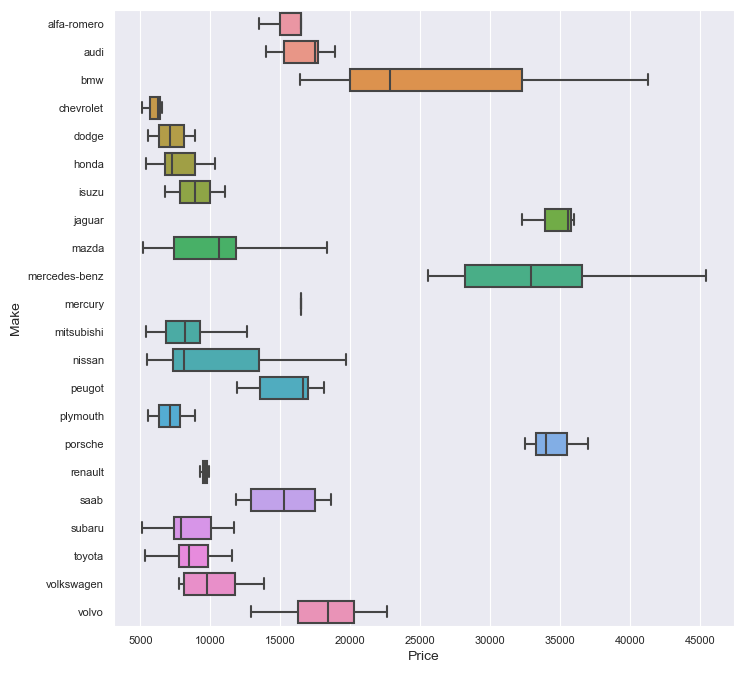

In [199]:
plt.figure(figsize=(8,8))
sns.boxplot(data=df,x='Price',y="Make")
plt.show()

In [200]:
df.shape

(189, 26)

***iii).Handling Categorical Data***

In [201]:
#To use label Encoading

lc = LabelEncoder()

In [202]:
#To apply label Encoader on given columns

df['Make'] = lc.fit_transform(df['Make'])
df['Fuel-Type'] = lc.fit_transform(df['Fuel-Type'])
df['Aspiration'] = lc.fit_transform(df['Aspiration'])
df['Num-Of-Doors'] = lc.fit_transform(df['Num-Of-Doors'])
df['Body-Style'] = lc.fit_transform(df['Body-Style'])
df['Drive-Wheels'] = lc.fit_transform(df['Drive-Wheels'])
df['Engine-Location'] = lc.fit_transform(df['Engine-Location'])
df['Engine-Type'] = lc.fit_transform(df['Engine-Type'])
df['Num-Of-Cylinders'] = lc.fit_transform(df['Num-Of-Cylinders'])
df['Fuel-System'] = lc.fit_transform(df['Fuel-System'])

In [203]:
df.sample(5)

,Symboling,Normalized-Losses,Make,Fuel-Type,Aspiration,Num-Of-Doors,Body-Style,Drive-Wheels,Engine-Location,Wheel-Base,Length,Width,Height,Curb-Weight,Engine-Type,Num-Of-Cylinders,Engine-Size,Fuel-System,Bore,Stroke,Compression-Ratio,Horsepower,Peak-rpm,City-mpg,Highway-mpg,Price
183,2,94.0,20,0,1,0,3,1,0,97.3,171.7,65.5,55.7,2319,2,2,97,3,3.01,3.40,9.00,68.0,4500.0,37,42.0,9495
20,1,118.0,4,1,0,1,2,1,0,93.7,157.3,63.8,50.8,1876,2,2,90,1,2.97,3.23,9.41,68.0,5500.0,37,41.0,5572
160,1,168.0,19,1,0,1,2,2,0,94.5,168.7,64.0,52.6,2204,2,2,98,1,3.19,3.03,9.00,70.0,4800.0,29,34.0,8238
39,0,85.0,5,1,0,0,3,1,0,96.5,175.4,62.5,54.1,2372,2,2,110,0,3.15,3.58,9.00,86.0,5800.0,27,33.0,10295
48,1,104.0,8,1,0,1,2,1,0,93.1,159.1,64.2,54.1,1900,2,2,91,1,3.03,3.15,9.00,68.0,5000.0,31,38.0,6095


***iv).Handling Skewness***

In [204]:
# Handle skewness of numerical columns.
num_col.columns

Index(['Symboling', 'Normalized-Losses', 'Wheel-Base', 'Length', 'Width',
       'Height', 'Curb-Weight', 'Engine-Size', 'Bore', 'Stroke',
       'Compression-Ratio', 'Horsepower', 'Peak-rpm', 'City-mpg',
       'Highway-mpg', 'Price'],
      dtype='object')

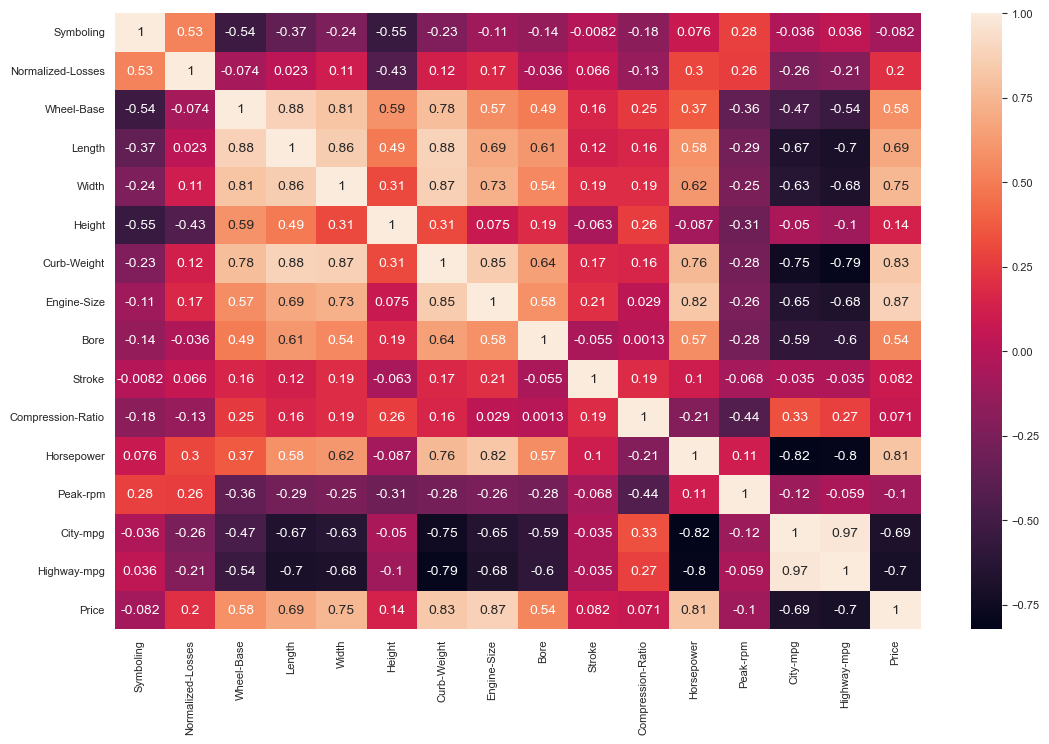

In [205]:
# To check on heatmap
plt.figure(figsize=(13,8))
sns.heatmap(num_col.corr(),annot=True)
plt.show()

In [206]:
df['Normalized-Losses'].skew()

0.40999837444360077

In [207]:
# Normalized-Losses is a right skew column hence applied log transform

df['Normalized-Losses'] = np.log(df['Normalized-Losses'])

In [208]:
df['Normalized-Losses'].skew()

-0.14800648950023595

***v).Scaling***

In [209]:
scale=MinMaxScaler() # for normalize data in the range of 0 to 1.

In [210]:
df[['Normalized-Losses','Wheel-Base','Length','Width','Height','Curb-Weight','Engine-Size','Horsepower','Peak-rpm']] = scale.fit_transform(df[['Normalized-Losses','Wheel-Base','Length','Width','Height','Curb-Weight','Engine-Size','Horsepower','Peak-rpm']])

In [211]:
cat_col.columns

Index(['Make', 'Fuel-Type', 'Aspiration', 'Num-Of-Doors', 'Body-Style',
       'Drive-Wheels', 'Engine-Location', 'Engine-Type', 'Num-Of-Cylinders',
       'Fuel-System'],
      dtype='object')

In [212]:
df[['Symboling','Bore','Stroke','Compression-Ratio','City-mpg','Highway-mpg']] = scale.fit_transform(df[['Symboling','Bore','Stroke','Compression-Ratio','City-mpg','Highway-mpg']])

In [213]:
df[['Make', 'Fuel-Type', 'Aspiration', 'Num-Of-Doors', 'Body-Style',
       'Drive-Wheels', 'Engine-Location', 'Engine-Type', 'Num-Of-Cylinders',
       'Fuel-System']] = scale.fit_transform(df[['Make', 'Fuel-Type', 'Aspiration', 'Num-Of-Doors', 'Body-Style',
       'Drive-Wheels', 'Engine-Location', 'Engine-Type', 'Num-Of-Cylinders',
       'Fuel-System']])

In [214]:
df.sample(5)

,Symboling,Normalized-Losses,Make,Fuel-Type,Aspiration,Num-Of-Doors,Body-Style,Drive-Wheels,Engine-Location,Wheel-Base,Length,Width,Height,Curb-Weight,Engine-Type,Num-Of-Cylinders,Engine-Size,Fuel-System,Bore,Stroke,Compression-Ratio,Horsepower,Peak-rpm,City-mpg,Highway-mpg,Price
172,0.2,0.000000,0.904762,1.0,0.0,0.0,0.75,0.5,0.0,0.572464,0.514925,0.62,0.591667,0.376117,0.4,0.333333,0.458647,0.666667,0.611111,0.728814,0.461538,0.323529,0.027027,0.43750,0.470588,10898
157,0.4,0.316813,0.904762,1.0,0.0,0.0,0.50,0.5,0.0,0.329710,0.376119,0.41,0.416667,0.257514,0.4,0.333333,0.278195,0.166667,0.515873,0.296610,0.576923,0.161765,0.351351,0.46875,0.529412,8358
186,1.0,0.537209,0.952381,1.0,0.0,1.0,0.50,0.5,0.0,0.286232,0.367164,0.37,0.300000,0.297725,0.4,0.333333,0.360902,0.666667,0.515873,0.610169,0.384615,0.308824,0.729730,0.34375,0.382353,9980
110,0.4,0.537209,0.619048,1.0,0.0,0.0,1.00,1.0,0.0,1.000000,0.862687,0.81,0.741667,0.729894,0.2,0.333333,0.443609,0.666667,0.730159,0.516949,0.346154,0.345588,0.459459,0.18750,0.235294,16695
96,0.4,0.460477,0.571429,1.0,0.0,0.0,0.50,0.5,0.0,0.384058,0.482090,0.49,0.575000,0.339561,0.4,0.333333,0.443609,0.166667,0.626984,0.669492,0.384615,0.360294,0.567568,0.43750,0.529412,8949


# 8.Feature Engineering.

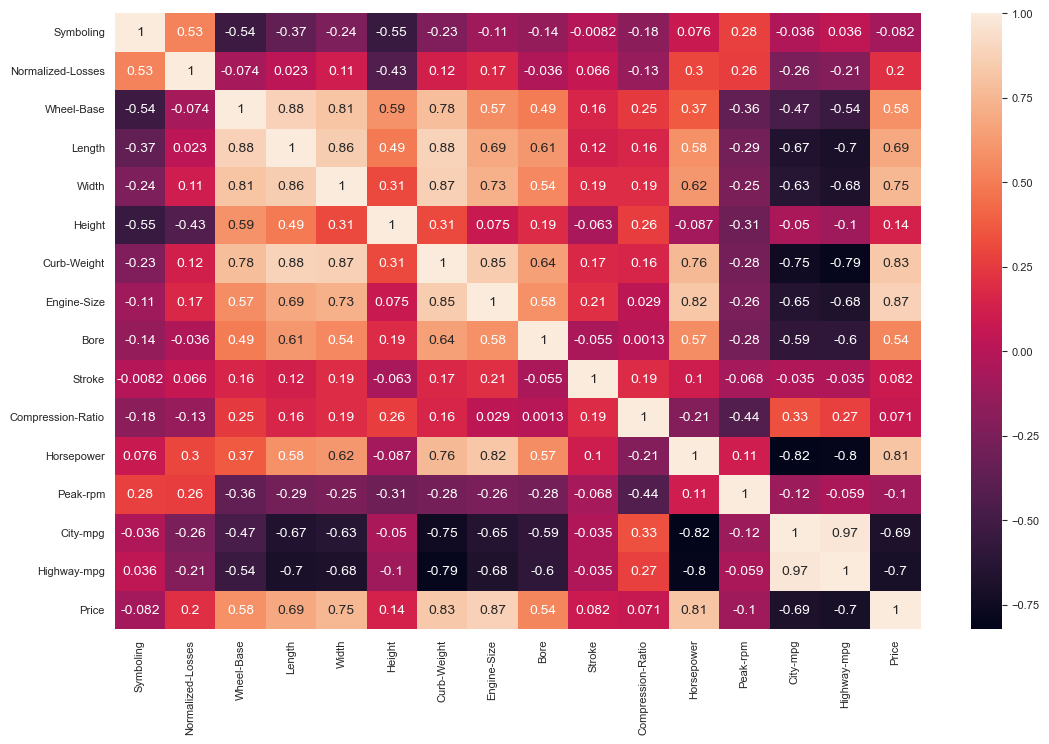

In [215]:
# To check on heatmap
plt.figure(figsize=(13,8))
sns.heatmap(num_col.corr(),annot=True)
plt.show()

# 9.Split Data into x and y

In [216]:
# Defining x and y

X=df.iloc[:,:-1] # First to last index -1
y=df.Price

In [217]:
X.sample(5)

,Symboling,Normalized-Losses,Make,Fuel-Type,Aspiration,Num-Of-Doors,Body-Style,Drive-Wheels,Engine-Location,Wheel-Base,Length,Width,Height,Curb-Weight,Engine-Type,Num-Of-Cylinders,Engine-Size,Fuel-System,Bore,Stroke,Compression-Ratio,Horsepower,Peak-rpm,City-mpg,Highway-mpg
0,1.0,0.537209,0.000000,1.0,0.0,1.0,0.00,1.0,0.0,0.072464,0.413433,0.38,0.083333,0.430544,0.0,0.333333,0.518797,0.666667,0.738095,0.000000,0.576923,0.463235,0.459459,0.2500,0.323529
84,0.6,0.615718,0.523810,1.0,1.0,0.0,0.75,0.5,0.0,0.351449,0.467164,0.51,0.316667,0.371649,0.4,0.333333,0.368421,0.833333,0.500000,0.661017,0.000000,0.500000,0.729730,0.3125,0.411765
110,0.4,0.537209,0.619048,1.0,0.0,0.0,1.00,1.0,0.0,1.000000,0.862687,0.81,0.741667,0.729894,0.2,0.333333,0.443609,0.666667,0.730159,0.516949,0.346154,0.345588,0.459459,0.1875,0.235294
75,0.8,0.854021,0.523810,1.0,0.0,1.0,0.50,0.5,0.0,0.257246,0.241791,0.41,0.250000,0.209586,0.4,0.333333,0.233083,0.166667,0.341270,0.466102,0.730769,0.147059,0.729730,0.5625,0.647059
23,0.6,0.774748,0.190476,1.0,0.0,0.0,0.50,0.5,0.0,0.257246,0.241791,0.35,0.233333,0.194557,0.4,0.333333,0.218045,0.166667,0.341270,0.466102,0.730769,0.147059,0.729730,0.5625,0.647059


In [218]:
y.sample(5)

98     13499
144     8013
119     7609
135     7053
103    18399
Name: Price, dtype: int64

# 10.Split data for trainning and testing

In [219]:
## preparing training 75% and testing 25% data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [220]:
X_train.shape ,X_test.shape, y_train.shape, y_test.shape

((141, 25), (48, 25), (141,), (48,))

# 11.Model Building And Evaluation

**i).Linear Model**

In [221]:
# Linear Regression

lr = LinearRegression()
lr.fit(X_train,y_train)


print("Before Trining :",lr.score(X_train,y_train)*100)
print("After Training :",lr.score(X_test,y_test)*100)

print("      ***Perfect Model***")

Before Trining : 86.10966324720977
After Training : 86.77735357568963
      ***Perfect Model***


In [222]:
# To find error in Linear regression

mean_squared_error(y_test,lr.predict(X_test)),mean_absolute_error(y_test,lr.predict(X_test)) 

(12994131.725458397, 2476.4070002374388)

In [223]:
# R2 square of Linear Rgression

r2_score(y_test,lr.predict(X_test))

0.8677735357568963

****************

In [224]:
# Lasso Regression

ls = Lasso(alpha=4)
ls.fit(X_train,y_train)

 
print("Before Trining :",ls.score(X_train,y_train)*100)
print("After Training :",ls.score(X_test,y_test)*100)
print("   ***Nearly Underfitting Model***")
 

Before Trining : 85.94102612080414
After Training : 83.32537643049388
   ***Nearly Underfitting Model***


In [225]:
# To find error in Lasso Regression

mean_squared_error(y_test,ls.predict(X_test)),mean_absolute_error(y_test,ls.predict(X_test)) 

(16386451.560576795, 2670.9591618283716)

In [226]:
# R2 square of Lasso Rgression

r2_score(y_test,ls.predict(X_test))

0.8332537643049388

**************************

In [227]:
# Ridge Regression

rg = Ridge(alpha=0.05)
rg.fit(X_train,y_train)


 
    
print("Before Trining :",rg.score(X_train,y_train)*100)
print("After Training :",rg.score(X_test,y_test)*100)
print("    ***Nearly Underfitting Model***")

Before Trining : 86.03994466557931
After Training : 84.37151030686782
    ***Nearly Underfitting Model***


In [228]:
# To find error in Ridge Regression

mean_squared_error(y_test,rg.predict(X_test)),mean_absolute_error(y_test,rg.predict(X_test)) 

(15358397.042906648, 2616.3116239032165)

In [229]:
# R2 square of  Ridge Rgression

r2_score(y_test,rg.predict(X_test))

0.8437151030686781

*****************************

In [230]:
# ElasticNet Regression

en = ElasticNet(alpha=0.01)
en.fit(X_train,y_train)

# Tilt toward overfitting
print("Before Trining :",en.score(X_train,y_train)*100)
print("After Training :",en.score(X_test,y_test)*100)
print("    ***Underfitting Model***") 

Before Trining : 83.78581059415482
After Training : 71.11653672158084
    ***Underfitting Model***


In [231]:
# To find error in ElasticNet Regression

mean_squared_error(y_test,en.predict(X_test)),mean_absolute_error(y_test,en.predict(X_test)) 

(28384297.249088213, 3144.7941219805302)

In [232]:
# R2 square of  ElasticNet Regression

r2_score(y_test,en.predict(X_test))

0.7111653672158085

**ii).Tree Based Model**

In [246]:
# Decision Tree

dt = DecisionTreeRegressor(max_depth=16)
dt.fit(X_train,y_train)


print("Before Trining :",dt.score(X_train,y_train)*100)
print("After Training :",dt.score(X_test,y_test)*100)
print("  ***Nearly Underfitting Model***")

Before Trining : 99.9197602702981
After Training : 94.39513811467285
  ***Nearly Underfitting Model***


In [234]:
# To find error in Decision Tree

mean_squared_error(y_test,dt.predict(X_test)),mean_absolute_error(y_test,dt.predict(X_test)) 

(52011994.708333336, 3514.25)

In [235]:
# R2 square of Decision Tree

r2_score(y_test,dt.predict(X_test))

0.47073322759691183

**iii).Support Vector Machine Model**

In [236]:
# Support Vector Regressor

sv = SVR()
sv.fit(X_train,y_train)

print("Before Trining :",sv.score(X_train,y_train)*100)
print("After Training :",sv.score(X_test,y_test)*100)
print("   ***Wrost Model***")

Before Trining : -12.833368041741956
After Training : -20.56197979322578
   ***Wrost Model***


In [237]:
# To find error in Support Vector Regressor

mean_squared_error(y_test,sv.predict(X_test)),mean_absolute_error(y_test,sv.predict(X_test)) 

(118478419.23950829, 6565.238002254152)

In [238]:
# R2 square ofSupport Vector Regressor

r2_score(y_test,sv.predict(X_test))

-0.20561979793225782

**iv).Neighbour Based Model**

In [249]:
#K-Nearest Neighbour

knn = KNeighborsRegressor(n_neighbors=2)
knn.fit(X_train,y_train)

print("Before Trining :",knn.score(X_train,y_train)*100)
print("After Training :",knn.score(X_test,y_test)*100)
print("    ***Underfitting Model***")

Before Trining : 96.31043992507283
After Training : 61.65523465007976
    ***Underfitting Model***


In [240]:
# To find error in K-Nearest Neighbour

mean_squared_error(y_test,knn.predict(X_test)),mean_absolute_error(y_test,knn.predict(X_test)) 

(37682088.4375, 3351.75)

In [241]:
# R2 square of K-Nearest Neighbour

r2_score(y_test,knn.predict(X_test))

0.6165523465007976

**v).Bagging algoritam based model**

In [242]:
#Random Forest

rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train,y_train)


print("Before Trining :",rf.score(X_train,y_train)*100)
print("After Training :",rf.score(X_test,y_test)*100)

print("    ***Nearly Underfitting Model***")

Before Trining : 98.10897447123227
After Training : 85.06341928188405
    ***Nearly Underfitting Model***


In [243]:
# To find error in Random Forest

mean_squared_error(y_test,rf.predict(X_test)),mean_absolute_error(y_test,rf.predict(X_test)) 

(14678445.687113138, 2393.1748958333337)

In [244]:
# R2 square of Random Forest

r2_score(y_test,rf.predict(X_test))

0.8506341928188406

***Conclusion***

In [245]:
#To dump a final model file

pickle.dump(LinearRegression,open('AutoPredPrice.pkl','wb'))

**************************************************************************************

# Report on Challenges faced